### Importing the required packages

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import nltk
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
from nltk import sent_tokenize, word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import string
from PIL import Image
import requests
from os import path, getcwd
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer

### Reading the Review Data Set

In [3]:
yelp_review = pd.read_csv('/Users/ambu/Desktop/DataScience/CapstoneProject/final_kaggle/reviews_reduced.csv')
yelp_review.head()

Unnamed: 0 Unnamed: 0.1             business_id cool                 date  \
0           0            0  ujmEBvifdJM6h6RLv4wQIg    0  2013-05-07 04:34:36   
1           4            4  b1b1eb3uo-w561D0ZfCEiQ    0  2018-01-30 23:07:38   
2           6            6  3fw2X5bZYeW9xCz_zGhOHg    5  2016-05-07 01:21:02   
3          21           21  Mem13A3C202RzT53npn4NA    9  2017-05-13 10:41:43   
4          25           25  FQ1wBQb3aNeRMThSQEV0Qg    0  2013-12-07 02:32:45   

   funny               review_id  stars  \
0    1.0  Q1sbwvVQXV2734tPgoKj4Q    1.0   
1    0.0  11a8sVPMUFtaC7_ABRkmtw    1.0   
2    4.0  G7XHMxG0bx9oBJNECG4IFg    3.0   
3    6.0  IPw8yWiyqnfBzzWmypUHgg    5.0   
4    0.0  I9HBDyzCqLhTYHCAZIFZQQ    5.0   

                                                text  useful  \
0  Total bill for this horrible service? Over $8G...     6.0   
1  Today was my second out of three sessions I ha...     7.0   
2  Tracy dessert had a big name in Hong Kong and ...     5.0   
3  If you are looking for the best pierogies in P...     9.0   
4  PlumbSmart provided superior service from begi...     4.0   

                  user_id  
0  hG7b0MtEbXx5QzbzE6C_VA  
1  ssoyf2_x0EQMed6fgHeMyQ  
2  jlu4CztcSxrKx56ba1a5AQ  
3  5JVY32_bmTBfIGpCCsnAfw  
4  vXZeHaLvdfCPATz5BDavow

In [4]:
yelp_review.drop(['Unnamed: 0.1','Unnamed: 0'],axis = 1, inplace = True)

#### Obtaining the shape of the data

In [5]:
yelp_review.shape

(665971, 9)

In [6]:
yelp_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665971 entries, 0 to 665970
Data columns (total 9 columns):
business_id    665971 non-null object
cool           665971 non-null object
date           665969 non-null object
funny          665969 non-null float64
review_id      665969 non-null object
stars          665969 non-null float64
text           665968 non-null object
useful         665967 non-null float64
user_id        665967 non-null object
dtypes: float64(3), object(6)
memory usage: 45.7+ MB


In [7]:
yelp_review.isnull().sum()

business_id    0
cool           0
date           2
funny          2
review_id      2
stars          2
text           3
useful         4
user_id        4
dtype: int64

In [8]:
yelp_review.useful.sort_values(ascending = False).head(20)

121055    1241.0
129494    1122.0
132543     970.0
130694     846.0
130432     808.0
115698     781.0
127834     694.0
120856     668.0
78674      650.0
128171     578.0
104885     539.0
131061     538.0
387233     526.0
106896     514.0
109932     509.0
102079     507.0
103798     500.0
127092     498.0
124442     467.0
264869     450.0
Name: useful, dtype: float64

#### Distribution of Review counts

In [9]:
Cust = []
for i in yelp_review['stars']:
    if (i >= 4):
        Cust.append('Good')
    elif (i <= 2):
        Cust.append('Bad')
    else:
        Cust.append('Neutral')

yelp_review['CustomerEXP'] = Cust

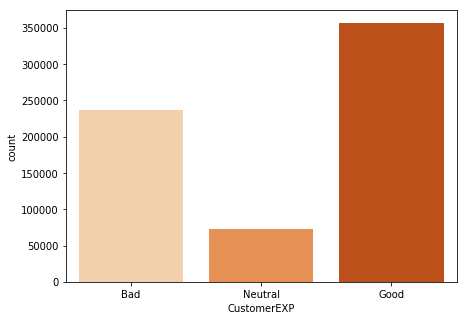

In [10]:
plt.figure(figsize = (7,5))
sns.countplot('CustomerEXP', data = yelp_review, palette="Oranges")

In [11]:
yelp_review.CustomerEXP.value_counts()

Good       356569
Bad        236886
Neutral     72516
Name: CustomerEXP, dtype: int64

#### WordCloud for Reviews

In [12]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['one','also','ive'])
stemmer = nltk.stem.PorterStemmer()
def clean_sentence(text):
    nopunc = [i for i in text if i not in string.punctuation]
    nn = "".join(nopunc)
    nn = nn.lower().split() 
    words_clean = [words for words in nn if words not in stopwords]
    return (words_clean)

In [13]:
good = yelp_review[yelp_review['CustomerEXP'] == 'Good']
bad = yelp_review[yelp_review['CustomerEXP'] == 'Bad']
neu = yelp_review[yelp_review['CustomerEXP'] == 'Neutral']

In [14]:
good_docs = good['text'].str.lower().str.replace('[^A-Za-z ]','')
bad_docs = bad['text'].str.lower().str.replace('[^A-Za-z ]','')
neu_docs = neu['text'].str.lower().str.replace('[^A-Za-z ]','')

In [15]:
good_bow = clean_sentence(str(good_docs))

In [16]:
bad_bow = clean_sentence(str(bad_docs))

In [17]:
neu_bow = clean_sentence(str(neu_docs))

In [18]:
good_para = ' '.join(good_bow)
bad_para = ' '.join(bad_bow)
new_para = ' '.join(neu_bow)

#### Positive Reviews WordCloud

In [19]:
d = getcwd()
thumbsup = np.array(Image.open(path.join(d,"thumbsup.png")))

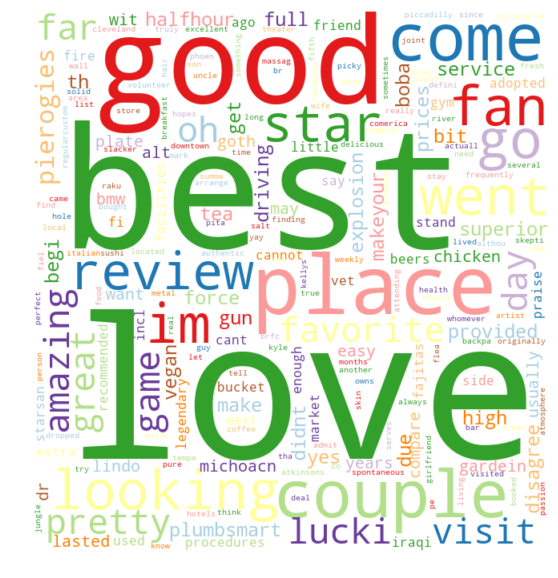

In [20]:
wordcloud_good = WordCloud(background_color = "white", colormap = "Paired",mask = thumbsup, 
                           width = 300, height = 200, scale=2,max_words=1000, 
                           stopwords=stopwords).generate(good_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_good, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_good.to_file("good.png")

#### Negative Reviews WordCloud

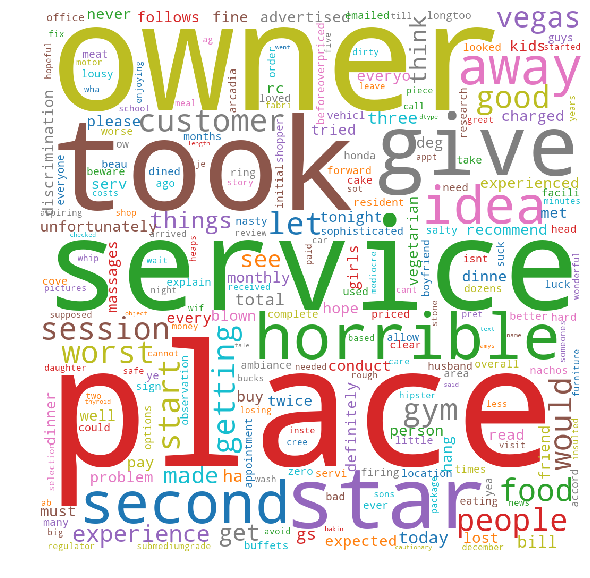

In [21]:
thumbsdown = np.array(Image.open(path.join(d,"thumbsdown.png")))
wordcloud_bad = WordCloud(background_color = 'white', colormap = 'tab10', mask = thumbsdown, 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(bad_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_bad,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_bad.to_file('bad.png')

#### Netural Reviews WordCloud

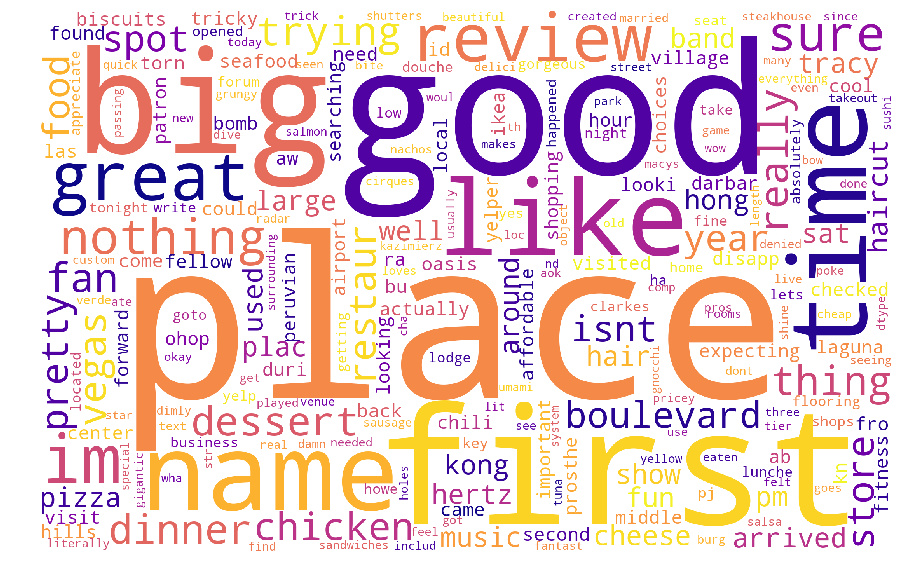

In [22]:
wordcloud_neu = WordCloud(background_color = 'white', colormap = "plasma", 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(new_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_neu,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_neu.to_file('neu.png')

### Reading the USERS Data Set

In [23]:
yelp_users = pd.read_csv('/Users/ambu/Desktop/DataScience/CapstoneProject/final_kaggle/yelp_user.csv')
yelp_users.head()

Unnamed: 0  average_stars  compliment_cool  compliment_cute  \
0           0           4.03                1                0   
1           1           3.63                1                0   
2           2           3.71                0                0   
3           3           4.85                0                0   
4           4           4.08               80                0   

   compliment_funny  compliment_hot  compliment_list  compliment_more  \
0                 1               2                0                0   
1                 1               1                0                0   
2                 0               0                0                0   
3                 0               1                0                0   
4                80              28                1                1   

   compliment_note  compliment_photos  ...  cool                elite  fans  \
0                1                  0  ...    25       2015,2016,2017     5   
1                0                  0  ...    16                  NaN     4   
2                1                  0  ...    10                  NaN     0   
3                0                  0  ...    14                  NaN     5   
4               16                  5  ...   665  2015,2016,2017,2018    39   

                                             friends funny    name  \
0  c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...    17  Rashmi   
1  kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...    22   Jenna   
2  4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...     8   David   
3  RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...     4  Angela   
4  mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...   279   Nancy   

  review_count  useful                 user_id        yelping_since  
0           95      84  l6BmjZMeQD3rDxWUbiAiow  2013-10-08 23:11:33  
1           33      48  4XChL029mKr5hydo79Ljxg  2013-02-21 22:29:06  
2           16      28  bc8C_eETBWL0olvFSJJd0w  2013-10-04 00:16:10  
3           17      30  dD0gZpBctWGdWo9WlGuhlA  2014-05-22 15:57:30  
4          361    1114  MM4RJAeH6yuaN8oZDSt0RA  2013-10-23 07:02:50  

[5 rows x 23 columns]

In [24]:
yelp_users.drop('Unnamed: 0', axis = 1, inplace = True)

In [25]:
yelp_users.shape

(1637138, 22)

In [26]:
yelp_users.isnull().sum()

average_stars               0
compliment_cool             0
compliment_cute             0
compliment_funny            0
compliment_hot              0
compliment_list             0
compliment_more             0
compliment_note             0
compliment_photos           0
compliment_plain            0
compliment_profile          0
compliment_writer           0
cool                        0
elite                 1565761
fans                        0
friends                     0
funny                       0
name                        3
review_count                0
useful                      0
user_id                     0
yelping_since               0
dtype: int64

### Reading the Business Data Set

In [27]:
yelp_business = pd.read_csv('/Users/ambu/Desktop/DataScience/CapstoneProject/final_kaggle/yelp_business.csv')
yelp_business.head()

Unnamed: 0                         address  \
0           0     2818 E Camino Acequia Drive   
1           1            30 Eglinton Avenue W   
2           2       10110 Johnston Rd, Ste 15   
3           3   15655 W Roosevelt St, Ste 237   
4           4  4209 Stuart Andrew Blvd, Ste F   

                                          attributes             business_id  \
0                           {'GoodForKids': 'False'}  1SWheh84yJXfytovILXOAQ   
1  {'RestaurantsReservations': 'True', 'GoodForMe...  QXAEGFB4oINsVuTFxEYKFQ   
2  {'GoodForKids': 'True', 'NoiseLevel': "u'avera...  gnKjwL_1w79qoiV3IC_xQQ   
3                                                NaN  xvX2CttrVhyG2z1dFg_0xw   
4  {'BusinessAcceptsBitcoin': 'False', 'ByAppoint...  HhyxOkGAM07SRYtlQ4wMFQ   

                                          categories         city  \
0                                  Golf, Active Life      Phoenix   
1  Specialty Food, Restaurants, Dim Sum, Imported...  Mississauga   
2                  Sushi Bars, Restaurants, Japanese    Charlotte   
3                      Insurance, Financial Services     Goodyear   
4  Plumbing, Shopping, Local Services, Home Servi...    Charlotte   

                                               hours  is_open   latitude  \
0                                                NaN        0  33.522143   
1  {'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...        1  43.605499   
2  {'Monday': '17:30-21:30', 'Wednesday': '17:30-...        1  35.092564   
3  {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...        1  33.455613   
4  {'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...        1  35.190012   

    longitude                             name postal_code  review_count  \
0 -112.018481       Arizona Biltmore Golf Club       85016             5   
1  -79.652289       Emerald Chinese Restaurant     L5R 3E7           128   
2  -80.859132      Musashi Japanese Restaurant       28210           170   
3 -112.395596  Farmers Insurance - Paul Lorenz       85338             3   
4  -80.887223              Queen City Plumbing       28217             4   

   stars state  
0    3.0    AZ  
1    2.5    ON  
2    4.0    NC  
3    5.0    AZ  
4    4.0    NC

In [28]:
yelp_business.drop('Unnamed: 0', axis = 1, inplace = True)

In [29]:
yelp_business.shape

(192609, 14)

In [30]:
yelp_business.isnull().sum()

address          7682
attributes      28836
business_id         0
categories        482
city                1
hours           44830
is_open             0
latitude            0
longitude           0
name                0
postal_code       659
review_count        0
stars               0
state               0
dtype: int64

#### Converting the category column in the buisness data set to string

In [31]:
yelp_business['categories'] = yelp_business['categories'].astype('str')

In [32]:
yelp_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
address         184927 non-null object
attributes      163773 non-null object
business_id     192609 non-null object
categories      192609 non-null object
city            192608 non-null object
hours           147779 non-null object
is_open         192609 non-null int64
latitude        192609 non-null float64
longitude       192609 non-null float64
name            192609 non-null object
postal_code     191950 non-null object
review_count    192609 non-null int64
stars           192609 non-null float64
state           192609 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


#### Splitting the categories in the buisness data set

In [33]:
cat = []
for x in yelp_business.categories:
    if  'pets' in x.lower():
        cat.append('Pets')
    elif  'religious' in x.lower():
        cat.append('Religious Org')
    elif  'school' in x.lower() or 'schools' in x.lower() or 'university' in x.lower() or 'education' in x.lower():
        cat.append('Education')
    elif  'gym' in x.lower() or 'fitness' in x.lower() or 'yoga' in x.lower() or 'trainers' in x.lower() or 'active life' in x.lower():
        cat.append('Fitness')
    elif  'bars' in x.lower() or 'nightlife' in x.lower() or 'entertainment' in x.lower() or 'wine' in x.lower()  or 'beer' in x.lower():
        cat.append('Bars')
    elif 'restaurants' in x.lower() or'smoothies' in x.lower() or'bakeries' in x.lower() or 'food' in x.lower() or 'coffee' in x.lower():
        cat.append('Restaurant')
    elif  'clothing' in x.lower() or'shopping' in x.lower() or 'books' in x.lower() or'grocery' in x.lower() or 'store' in x.lower():
        cat. append('Shopping')
    elif 'automotive' in x.lower():
        cat.append('Automotive')
    elif 'spa' in x.lower() or 'Salons' in x.lower() or 'massage' in x.lower() or 'beauty' in x.lower():
        cat.append('Spa')
    elif 'service' in x.lower() or 'services' in x.lower()  or 'event' in x.lower():
        cat.append('Service')
    elif 'parks' in x.lower() or  'lakes' in x.lower() or 'zoo' in x.lower() or 'pools' in x.lower():
        cat.append('Parks')
    elif 'travel' in x.lower():
        cat.append('Travel')
    elif 'Medical' in x.lower() or 'health' in x.lower():
        cat.append('Medical')


    else:
        cat.append('Others')

In [34]:
yelp_business['cat_desc'] = cat

In [35]:
yelp_business.head()

address  \
0     2818 E Camino Acequia Drive   
1            30 Eglinton Avenue W   
2       10110 Johnston Rd, Ste 15   
3   15655 W Roosevelt St, Ste 237   
4  4209 Stuart Andrew Blvd, Ste F   

                                          attributes             business_id  \
0                           {'GoodForKids': 'False'}  1SWheh84yJXfytovILXOAQ   
1  {'RestaurantsReservations': 'True', 'GoodForMe...  QXAEGFB4oINsVuTFxEYKFQ   
2  {'GoodForKids': 'True', 'NoiseLevel': "u'avera...  gnKjwL_1w79qoiV3IC_xQQ   
3                                                NaN  xvX2CttrVhyG2z1dFg_0xw   
4  {'BusinessAcceptsBitcoin': 'False', 'ByAppoint...  HhyxOkGAM07SRYtlQ4wMFQ   

                                          categories         city  \
0                                  Golf, Active Life      Phoenix   
1  Specialty Food, Restaurants, Dim Sum, Imported...  Mississauga   
2                  Sushi Bars, Restaurants, Japanese    Charlotte   
3                      Insurance, Financial Services     Goodyear   
4  Plumbing, Shopping, Local Services, Home Servi...    Charlotte   

                                               hours  is_open   latitude  \
0                                                NaN        0  33.522143   
1  {'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...        1  43.605499   
2  {'Monday': '17:30-21:30', 'Wednesday': '17:30-...        1  35.092564   
3  {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...        1  33.455613   
4  {'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...        1  35.190012   

    longitude                             name postal_code  review_count  \
0 -112.018481       Arizona Biltmore Golf Club       85016             5   
1  -79.652289       Emerald Chinese Restaurant     L5R 3E7           128   
2  -80.859132      Musashi Japanese Restaurant       28210           170   
3 -112.395596  Farmers Insurance - Paul Lorenz       85338             3   
4  -80.887223              Queen City Plumbing       28217             4   

   stars state    cat_desc  
0    3.0    AZ     Fitness  
1    2.5    ON  Restaurant  
2    4.0    NC        Bars  
3    5.0    AZ     Service  
4    4.0    NC    Shopping

In [36]:
yelp_business.cat_desc.value_counts().sort_values(ascending = False)

Restaurant       59396
Service          28905
Shopping         25929
Bars             21033
Spa              17270
Automotive       11365
Medical           9819
Fitness           8669
Pets              4111
Education         3319
Travel            1498
Others             688
Religious Org      580
Parks               27
Name: cat_desc, dtype: int64

#### Dsitribution of Ratings

In [37]:
x_bus = yelp_business['stars'].value_counts().index
y_bus = yelp_business['stars'].value_counts().values

Text(0.5, 0, 'Ratings ')

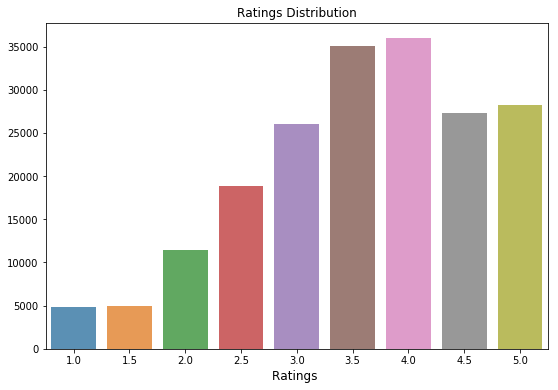

In [38]:
plt.figure(figsize=(9,6))
ax= sns.barplot(x_bus, y_bus, data= yelp_business ,alpha=0.8 )
plt.title("Ratings Distribution")
plt.xlabel('Ratings ', fontsize=12)

#### Distribution of Review counts with Ratings 

Text(0.5, 0, 'Ratings ')

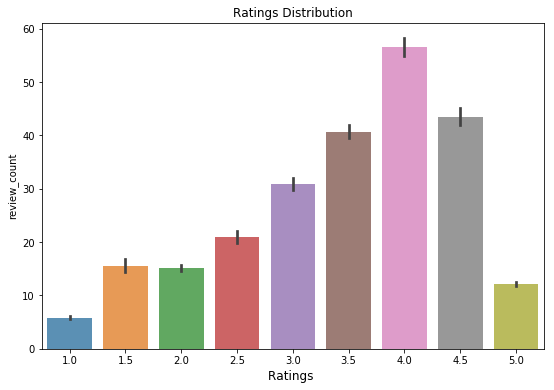

In [39]:
plt.figure(figsize=(9,6))
ax= sns.barplot(x = 'stars', y = 'review_count',data= yelp_business ,alpha=0.8 )
plt.title("Ratings Distribution")
plt.xlabel('Ratings ', fontsize=12)

#### Types of Business

In [40]:
business_cat=yelp_business['cat_desc']
categry=pd.DataFrame(business_cat,columns=['cat_desc'])
x_cat = categry.cat_desc.value_counts()
x_cat = x_cat.sort_values(ascending=False)
x_cat = x_cat.iloc[0:20]

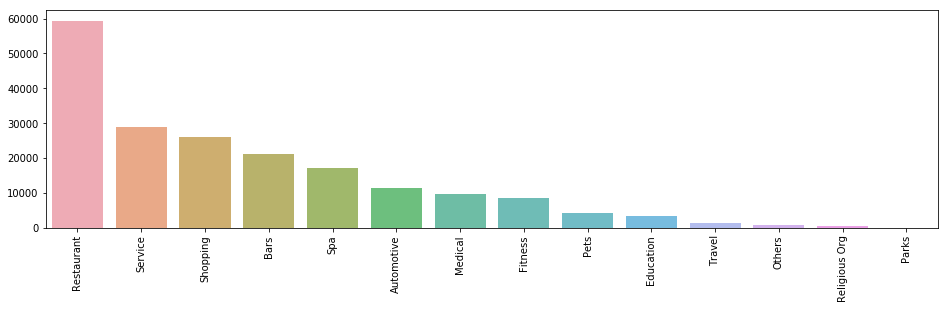

In [41]:
plt.figure(figsize=(16,4))
ax = sns.barplot(x_cat.index, x_cat.values, alpha=0.8)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

#### Cities with most Business

In [42]:
x_busci = yelp_business['city'].value_counts().sort_values(ascending = False)
x_busci = x_busci.iloc[0:25]

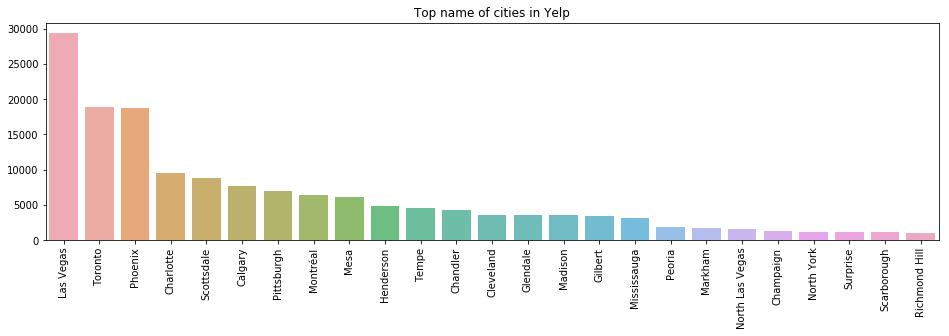

In [43]:
plt.figure(figsize=(16,4))
ax = sns.barplot(x_busci.index, x_busci.values, alpha=0.8)
ax.set_xlabel('')
ax.set_title('Top name of cities in Yelp')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

#### Most Reviewed Business

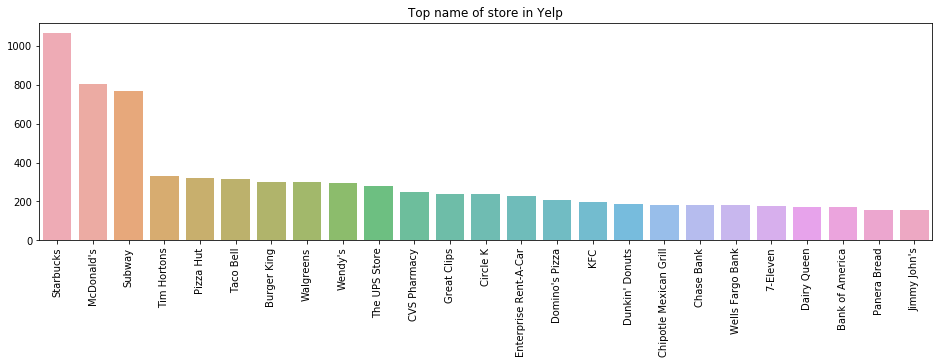

In [44]:
x_bunm = yelp_business['name'].value_counts().sort_values(ascending = False)
x_bunm = x_bunm.iloc[0:25]
plt.figure(figsize=(16,4))
ax = sns.barplot(x_bunm.index, x_bunm.values, alpha=0.8)
ax.set_xlabel('')
ax.set_title('Top name of store in Yelp')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

Number of city listed 1203


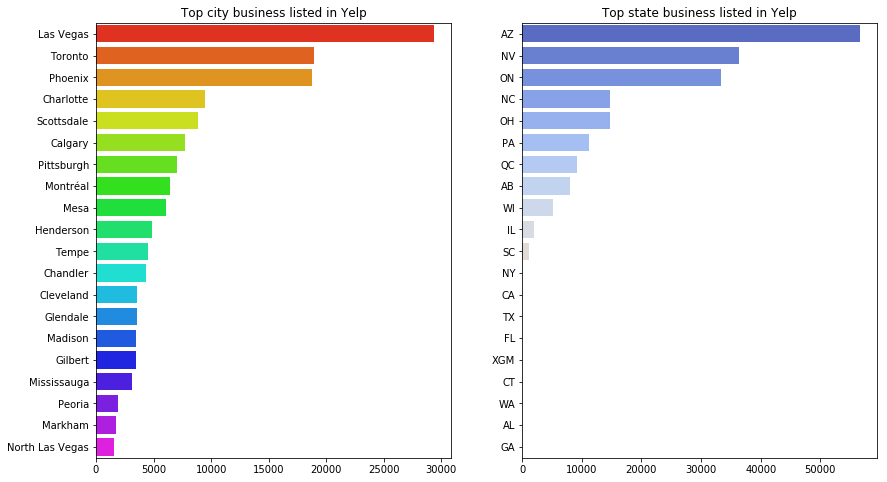

In [45]:
print('Number of city listed',yelp_business['city'].nunique())
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = yelp_business['city'].value_counts()[:20].to_frame()

sns.barplot(cnt['city'], cnt.index, palette = 'gist_rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top city business listed in Yelp')

cnt = yelp_business['state'].value_counts()[:20].to_frame()

sns.barplot(cnt['state'], cnt.index, palette = 'coolwarm', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top state business listed in Yelp');

#### Top reviews

Median review count 9.0


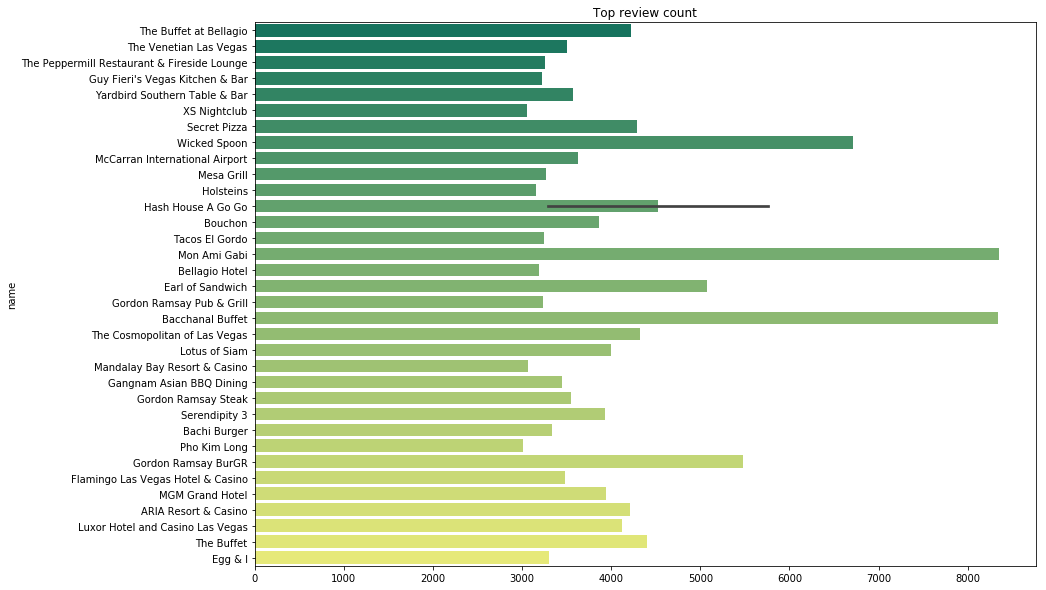

In [46]:
print('Median review count',yelp_business['review_count'].median())
plt.figure(figsize = (14,10))
sns.barplot(yelp_business[yelp_business['review_count'] >3000]['review_count'].sort_values(ascending = False),
            yelp_business[yelp_business['review_count'] >3000]['name'],
           palette = 'summer')
plt.xlabel('')
plt.title('Top review count');

#### Business is open

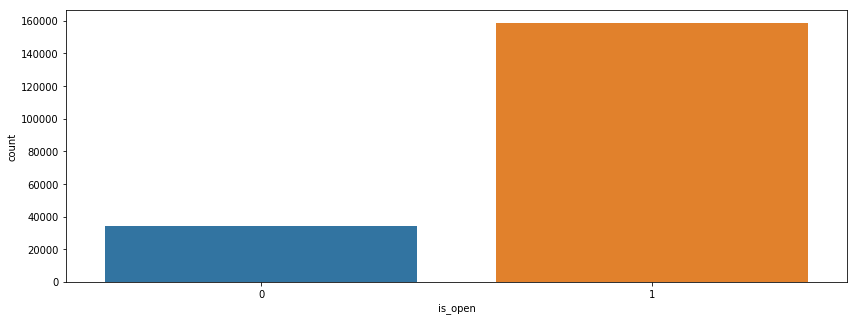

In [47]:
plt.figure(figsize=(14,5))
sns.countplot(yelp_business['is_open'])

#### Business Category wordcloud

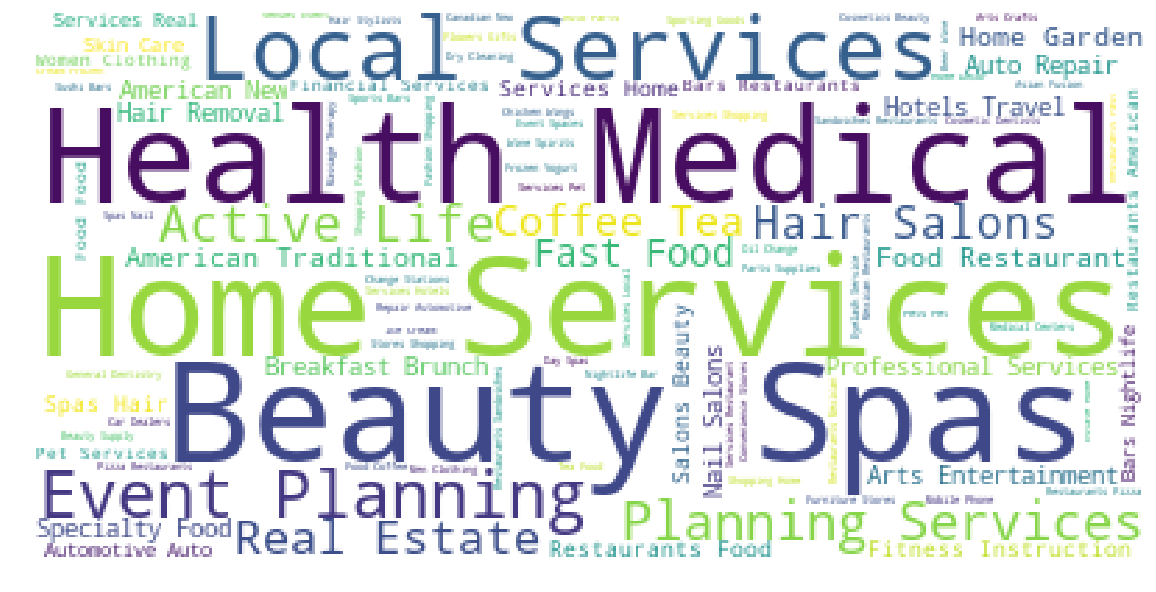

In [48]:
cloud_buscat = WordCloud(background_color = 'white',
                  max_words= 1000).generate(' '.join(yelp_business['categories'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud_buscat)
plt.axis('off')
cloud_buscat.to_file("business_cat.png");

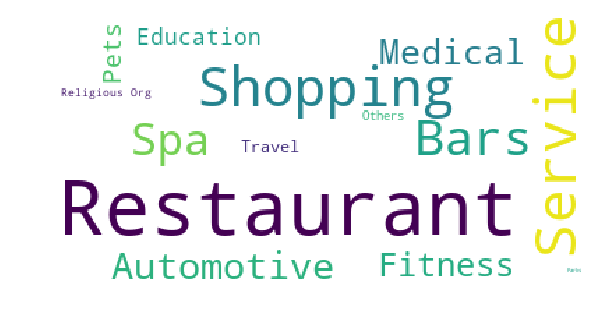

In [49]:
cloud_tpbus = WordCloud(background_color = 'white',
                  max_words= 1000).generate(' '.join(yelp_business['cat_desc'].astype(str)))
plt.figure(figsize=(10, 8))
plt.imshow(cloud_tpbus)
plt.axis('off');
cloud_tpbus.to_file("topbusiness_cat.png")

### Reading the Checkin Data Set

In [50]:
yelp_checkin = pd.read_csv('/Users/ambu/Desktop/DataScience/CapstoneProject/final_kaggle/yelp_checkin.csv')
yelp_checkin.head()

Unnamed: 0             business_id  \
0           0  --1UhMGODdWsrMastO9DZw   
1           1  --6MefnULPED_I942VcFNA   
2           2  --7zmmkVg-IMGaXbuVd0SQ   
3           3  --8LPVSo5i0Oo61X01sV9A   
4           4  --9QQLMTbFzLJ_oT-ON3Xw   

                                                date  
0  2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016...  
1  2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012...  
2  2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015...  
3                                2016-07-08 16:43:30  
4  2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010...

In [51]:
yelp_checkin.drop('Unnamed: 0', axis = 1, inplace = True)

In [52]:
yelp_checkin.shape

(161950, 2)

In [53]:
datelist=[]
for i in range(len(yelp_checkin)):
    datelist.append(yelp_checkin.date[i].split(', '))

In [54]:
dateli = []
timeli = []
for i in datelist:
    for j in i:
        temp=pd.datetime.strptime(j, '%Y-%m-%d %H:%M:%S')
        dateli.append(temp.date())
        timeli.append(temp.time())

In [55]:
checkin_dati = pd.DataFrame({'Date': dateli, 'Time': timeli})
checkin_dati.head()

Date      Time
0  2016-04-26  19:49:16
1  2016-08-30  18:36:57
2  2016-10-15  02:45:18
3  2016-11-18  01:54:50
4  2017-04-20  18:39:06

In [56]:
yelp_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161950 entries, 0 to 161949
Data columns (total 2 columns):
business_id    161950 non-null object
date           161950 non-null object
dtypes: object(2)
memory usage: 2.5+ MB


In [57]:
yelp_checkin.isnull().sum()

business_id    0
date           0
dtype: int64

### Reading the Tip Data Set

In [58]:
yelp_tip = pd.read_csv('/Users/ambu/Desktop/DataScience/CapstoneProject/final_kaggle/yelp_tip.csv')
yelp_tip.head()

Unnamed: 0             business_id  compliment_count                 date  \
0           0  VaKXUpmWTTWDKbpJ3aQdMw                 0  2014-03-27 03:51:24   
1           1  OPiPeoJiv92rENwbq76orA                 0  2013-05-25 06:00:56   
2           2  5KheTjYPu1HcQzQFtm4_vw                 0  2011-12-26 01:46:17   
3           3  TkoyGi8J7YFjA6SbaRzrxg                 0  2014-03-23 21:32:49   
4           4  AkL6Ous6A1atZejfZXn1Bg                 0  2012-10-06 00:19:27   

                                                text                 user_id  
0  Great for watching games, ufc, and whatever el...  UPw5DWs_b-e2JRBS-t37Ag  
1  Happy Hour 2-4 daily with 1/2 price drinks and...  Ocha4kZBHb4JK0lOWvE0sg  
2  Good chips and salsa. Loud at times. Good serv...  jRyO2V1pA4CdVVqCIOPc1Q  
3  The setting and decoration here is amazing. Co...  FuTJWFYm4UKqewaosss1KA  
4  Molly is definately taking a picture with Sant...  LUlKtaM3nXd-E4N4uOk_fQ

In [59]:
yelp_tip.drop('Unnamed: 0', axis = 1, inplace = True)

In [60]:
yelp_tip.shape

(1223094, 5)

In [61]:
yelp_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223094 entries, 0 to 1223093
Data columns (total 5 columns):
business_id         1223094 non-null object
compliment_count    1223094 non-null int64
date                1223094 non-null object
text                1223090 non-null object
user_id             1223094 non-null object
dtypes: int64(1), object(4)
memory usage: 46.7+ MB


In [62]:
yelp_tip.isnull().sum()

business_id         0
compliment_count    0
date                0
text                4
user_id             0
dtype: int64

#### Tips Wordcloud

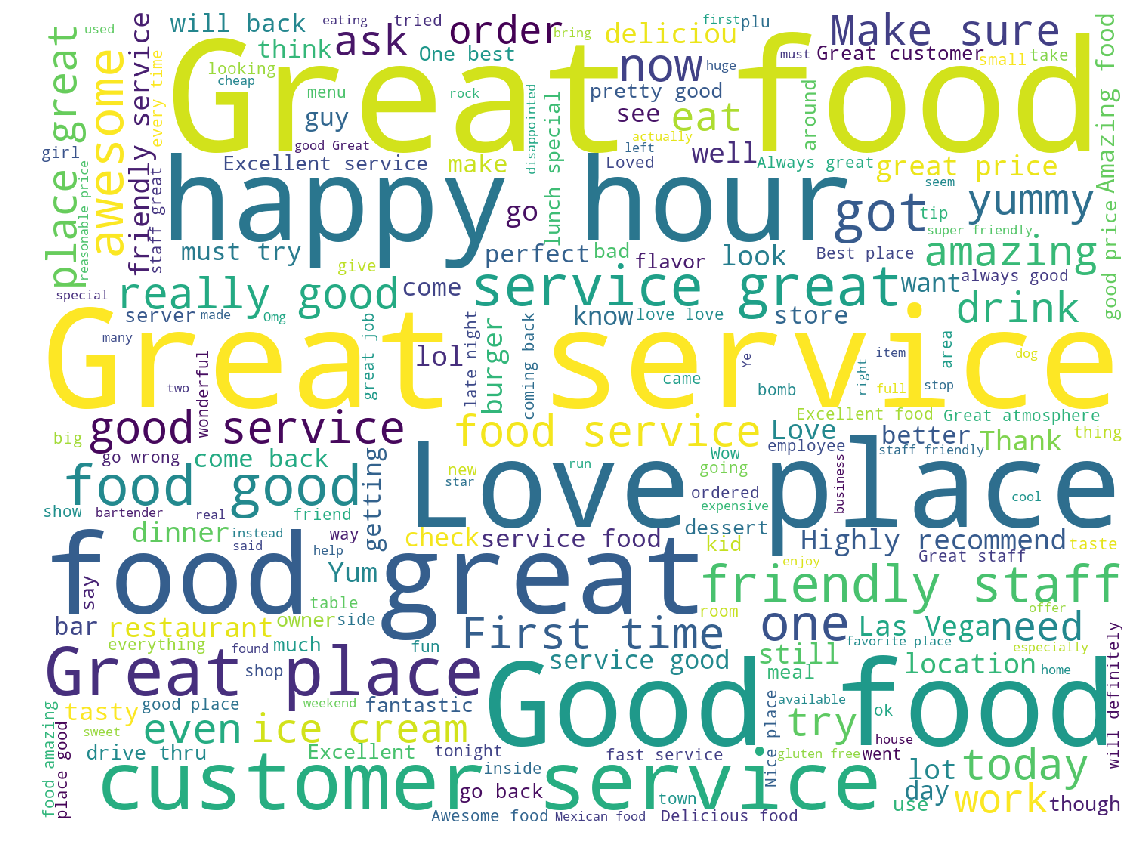

In [63]:
cloud = WordCloud(background_color = 'white', 
                  width=1440, height= 1080,max_words= 200).generate(' '.join(yelp_tip['text'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
cloud.to_file("tip_wordcloud.png");

#### Tips Text Feature

In [64]:
yelp_tip['num_words'] = yelp_tip['text'].str.len()
yelp_tip['num_uniq_words'] = yelp_tip['text'].apply(lambda x: len(set(str(x).split())))
yelp_tip['num_chars'] = yelp_tip['text'].apply(lambda x: len(str(x)))
yelp_tip['num_stopwords'] = yelp_tip['text'].apply(lambda x: len([w for w in str(x).lower().split() 
                                                      if w in set(stopwords)]))

Text(0.5, 1.0, 'Distribution of Stop words')

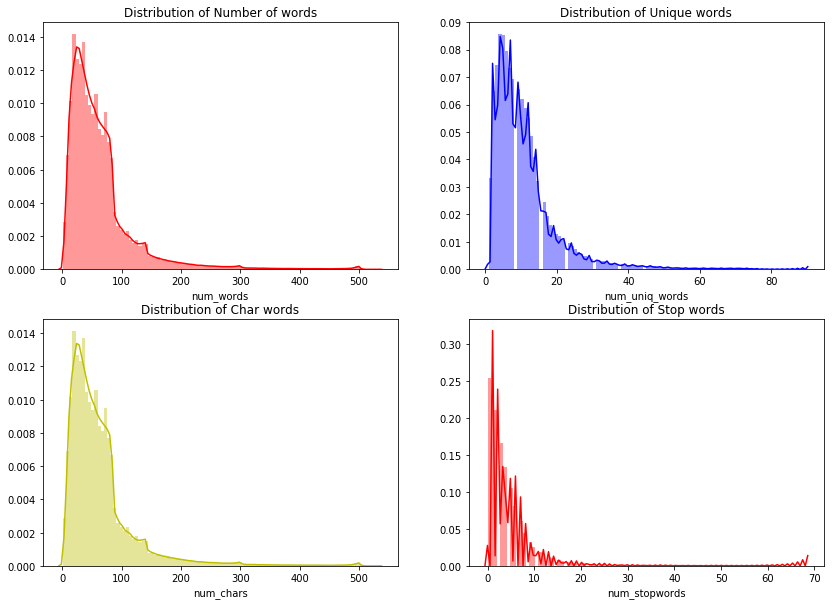

In [65]:
f, ax = plt.subplots(2,2, figsize = (14,10))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(yelp_tip['num_words'],bins=100,color='r', ax=ax1)
ax1.set_title('Distribution of Number of words')

sns.distplot(yelp_tip['num_uniq_words'],bins=100,color='b', ax=ax2)
ax2.set_title('Distribution of Unique words')

sns.distplot(yelp_tip['num_chars'],bins=100,color='y', ax=ax3)
ax3.set_title('Distribution of Char words')

sns.distplot(yelp_tip['num_stopwords'],bins=100,color='r', ax=ax4)
ax4.set_title('Distribution of Stop words')

#### Stars Distribution by Year and Month

Text(0, 0.5, '')

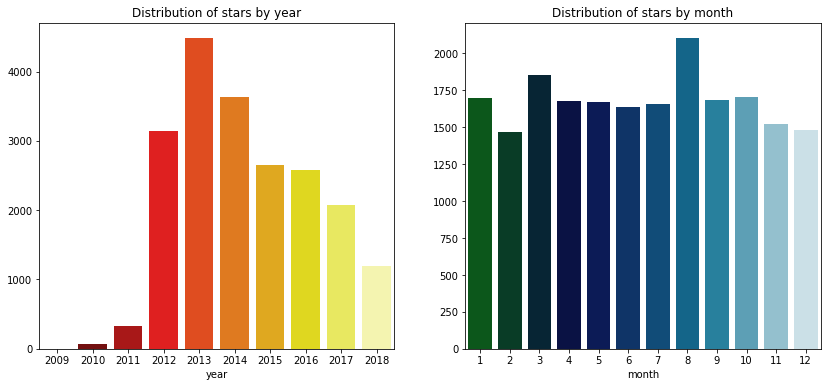

In [66]:
yelp_tip['date'] = pd.to_datetime(yelp_tip['date'])
yelp_tip['year'] = yelp_tip['date'].dt.year
yelp_tip['month'] = yelp_tip['date'].dt.month

f,ax = plt.subplots(1,2,figsize = (14,6))
ax1,ax2 = ax.flatten()
cnt  = yelp_tip.groupby('year').sum()['compliment_count'].to_frame()
sns.barplot(cnt.index,cnt['compliment_count'],palette='hot', ax = ax1)
ax1.set_title('Distribution of stars by year')
ax1.set_ylabel('')

cnt  = yelp_tip.groupby('month').sum()['compliment_count'].to_frame()
sns.barplot(cnt.index,cnt['compliment_count'],palette='ocean', ax = ax2)
ax2.set_title('Distribution of stars by month')
ax2.set_ylabel('')

### Merging Review and Business

In [67]:
yelp_rb = pd.merge(yelp_review,yelp_business, on = 'business_id', how = 'inner')
yelp_rb.head()

business_id cool                 date  funny  \
0  ujmEBvifdJM6h6RLv4wQIg    0  2013-05-07 04:34:36    1.0   
1  ujmEBvifdJM6h6RLv4wQIg    0  2015-08-19 16:39:53    2.0   
2  ujmEBvifdJM6h6RLv4wQIg    3  2013-08-04 10:55:04   10.0   
3  ujmEBvifdJM6h6RLv4wQIg    0  2015-11-19 06:39:58    0.0   
4  ujmEBvifdJM6h6RLv4wQIg    2  2016-02-12 09:49:59    3.0   

                review_id  stars_x  \
0  Q1sbwvVQXV2734tPgoKj4Q      1.0   
1  cG9ujooLXVLUn4O12_AdNA      5.0   
2  UoUPBrMsp8VGyf3_BBYB7w      1.0   
3  QGbPClwdlXukXBiLoqTGdg      1.0   
4  lX7DungpVlbJh9r5xHmZ6Q      4.0   

                                                text  useful  \
0  Total bill for this horrible service? Over $8G...     6.0   
1  Don't get sick. But if you do, come here.\r\r\...     4.0   
2  Must knows for this TRULY MAGICAL healthcare f...    12.0   
3  On November 17 my grandmother fell ill and we ...    15.0   
4  Walking in here. I thought I'd end up waiting ...     4.0   

                  user_id CustomerEXP  ...  \
0  hG7b0MtEbXx5QzbzE6C_VA         Bad  ...   
1  46TNf-5T5EcNFRJPYv_nrw        Good  ...   
2  56iEnLi8jR--2ranjPSQ4w         Bad  ...   
3  MJYkCvxASq9GKEXDrmhB0Q         Bad  ...   
4  PgjzouAp8FyOwh6J83D4rA        Good  ...   

                                               hours is_open   latitude  \
0  {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...       1  36.215546   
1  {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...       1  36.215546   
2  {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...       1  36.215546   
3  {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...       1  36.215546   
4  {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...       1  36.215546   

    longitude                   name  postal_code  review_count  stars_y  \
0 -115.248798  MountainView Hospital        89128           238      2.5   
1 -115.248798  MountainView Hospital        89128           238      2.5   
2 -115.248798  MountainView Hospital        89128           238      2.5   
3 -115.248798  MountainView Hospital        89128           238      2.5   
4 -115.248798  MountainView Hospital        89128           238      2.5   

  state cat_desc  
0    NV  Fitness  
1    NV  Fitness  
2    NV  Fitness  
3    NV  Fitness  
4    NV  Fitness  

[5 rows x 24 columns]

#### Null value calculation for the merged data set

In [68]:
yelp_rb.isnull().sum()

business_id         0
cool                0
date                0
funny               0
review_id           0
stars_x             0
text                1
useful              2
user_id             2
CustomerEXP         0
address         12592
attributes      42699
categories          0
city                1
hours           67438
is_open             0
latitude            0
longitude           0
name                0
postal_code      1039
review_count        0
stars_y             0
state               0
cat_desc            0
dtype: int64

#### Top 5 Business Category WordCloud

In [69]:
restaurant = yelp_rb[yelp_rb['cat_desc'] == 'Restaurant']
service = yelp_rb[yelp_rb['cat_desc'] == 'Service']
shopping = yelp_rb[yelp_rb['cat_desc'] == 'Shopping']
medical = yelp_rb[yelp_rb['cat_desc'] == 'Medical']
fitness = yelp_rb[yelp_rb['cat_desc'] == 'Fitness']

In [70]:
restaurant_docs = restaurant['text'].str.lower().str.replace('[^A-Za-z ]','')
service_docs = service['text'].str.lower().str.replace('[^A-Za-z ]','')
shopping_docs = shopping['text'].str.lower().str.replace('[^A-Za-z ]','')
medical_docs = medical['text'].str.lower().str.replace('[^A-Za-z ]','')
fitness_docs = fitness['text'].str.lower().str.replace('[^A-Za-z ]','')

In [71]:
service_ndocs=[]
for i in service_docs:
    temp = str(i)
    if temp.isalnum():
        print(i)
    else:
        service_ndocs.append(i)

service_ndocs=pd.Series(service_ndocs)

httpwwwazcentralcomnewsarticleschandlermoverssuedjudgmenthtml
nan
httpwwwazcentralcomnewsarticleschandlermoverssuedjudgmenthtml
httpwwwazfamilycomnewsconsumerphoenixfamilyclaimoutrageovercarpetcleaningbaitandswitchhtmlhttpwwwbbborgcentralnorthernwesternarizonabusinessreviewscarpetandrugcleanersprocarecarpetairductcleaningofarizonaincintempeaz


In [72]:
restaurant_clean = restaurant_docs.apply(clean_sentence)

In [73]:
service_clean = service_ndocs.apply(clean_sentence)

In [74]:
service_new = service_clean

In [75]:
shopping_clean = shopping_docs.apply(clean_sentence)

In [76]:
medical_clean = medical_docs.apply(clean_sentence)

In [77]:
fitness_clean = fitness_docs.apply(clean_sentence)

#### Restaurant WordCloud

In [78]:
restaurant_para = str(restaurant_clean)

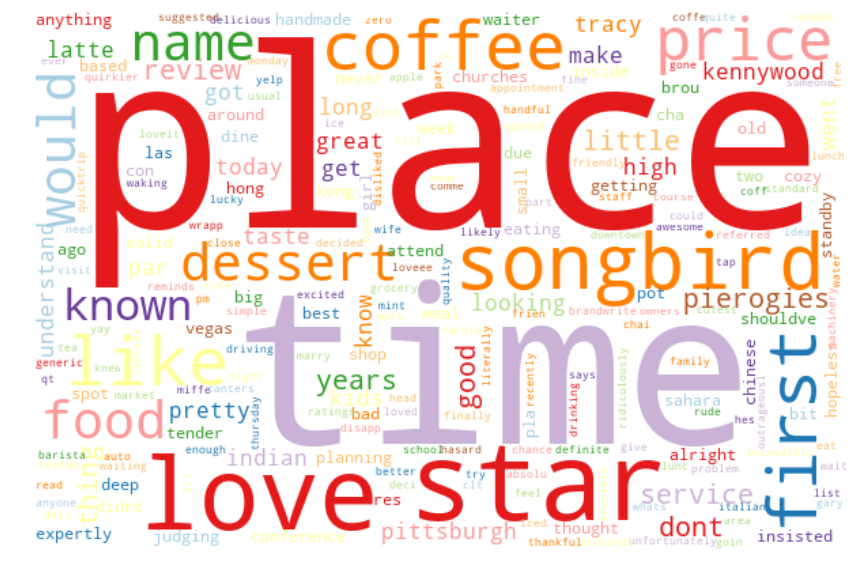

In [79]:
wordcloud_rest = WordCloud(background_color = 'white', colormap = "Paired", 
                           width = 300, height = 200, scale=2, 
                           max_words=1000, stopwords=stopwords).generate(restaurant_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_rest, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_rest.to_file("restaurant_review.png")

#### Service WordCloud

In [80]:
service_para = str(service_clean)

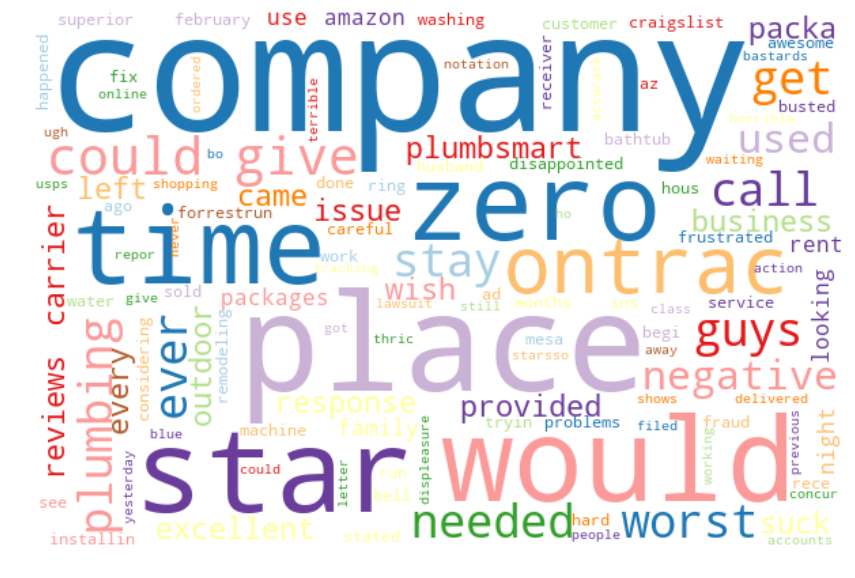

In [81]:
wordcloud_serv = WordCloud(background_color = 'white', colormap = "Paired", 
                           width = 300, height = 200, scale=2, 
                           max_words=1000, stopwords=stopwords).generate(service_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_serv, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_serv.to_file("service_review.png")

#### Shopping WordCloud

In [82]:
shopping_para = str(shopping_clean)

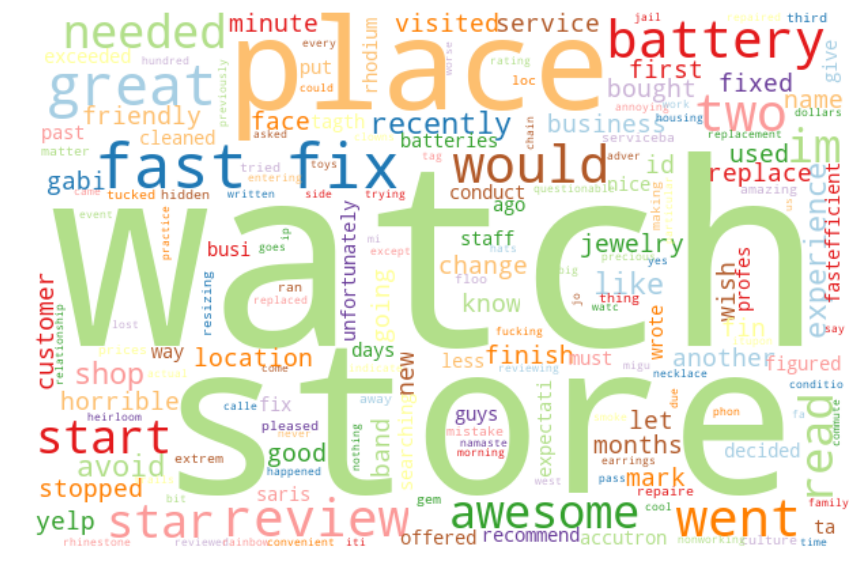

In [83]:
wordcloud_shop = WordCloud(background_color = 'white', colormap = "Paired", 
                           width = 300, height = 200, scale=2, 
                           max_words=1000, stopwords=stopwords).generate(shopping_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_shop, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_shop.to_file("shop_review.png")

#### Medical WordCloud

In [84]:
medical_para = str(medical_clean)

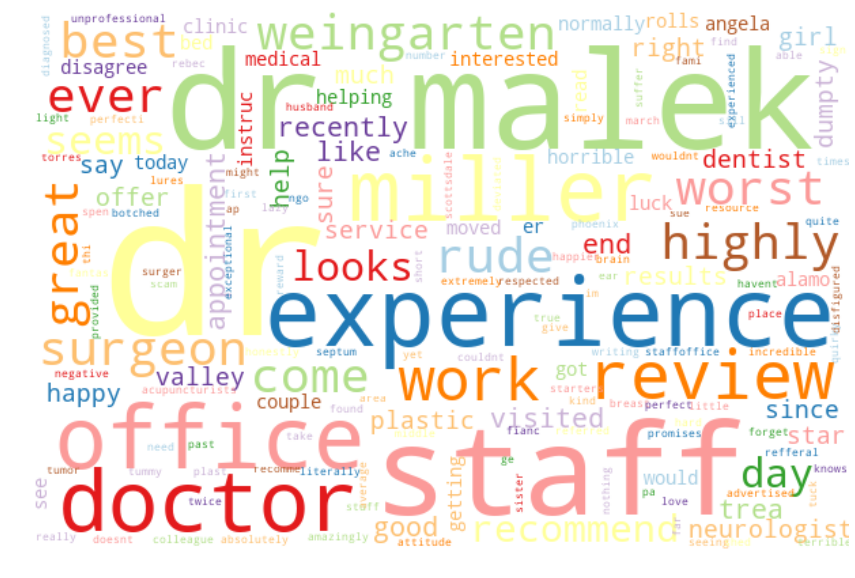

In [85]:
wordcloud_med = WordCloud(background_color = 'white', colormap = "Paired", 
                           width = 300, height = 200, scale=2, 
                           max_words=1000, stopwords=stopwords).generate(medical_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_med, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_med.to_file("medical_review.png")

#### Fitness WordCloud

In [86]:
fitness_para = str(fitness_clean)

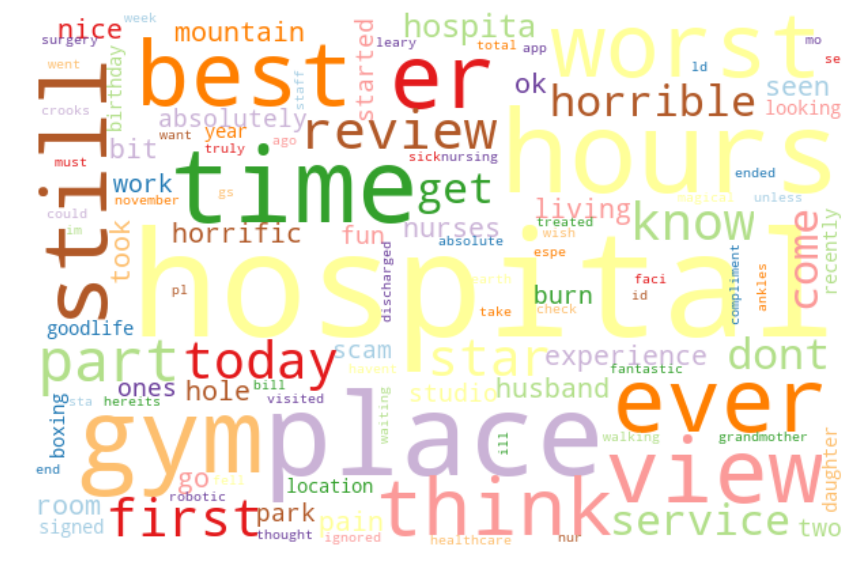

In [87]:
wordcloud_fit = WordCloud(background_color = 'white', colormap = "Paired", 
                           width = 300, height = 200, scale=2, 
                           max_words=1000, stopwords=stopwords).generate(fitness_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_fit, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_fit.to_file("fitness_review.png")

### Top 5 Buisness Category WordCloud with CustomerExperience

### Restaurant

In [88]:
restaurant_good = restaurant[restaurant['CustomerEXP']== 'Good']
restaurant_bad = restaurant[restaurant['CustomerEXP']== 'Bad']
restaurant_neu = restaurant[restaurant['CustomerEXP']== 'Neutral']

In [89]:
restaurant_good_docs = restaurant_good['text'].str.lower().str.replace('[^A-Za-z ]','')
restaurant_bad_docs = restaurant_bad['text'].str.lower().str.replace('[^A-Za-z ]','')
restaurant_neu_docs = restaurant_neu['text'].str.lower().str.replace('[^A-Za-z ]','')

#### Good,Bad,Neutral Review Text Cleaning

In [90]:
restaurant_good_clean = restaurant_good_docs.apply(clean_sentence)

In [91]:
restaurant_bad_clean = restaurant_bad_docs.apply(clean_sentence)

In [92]:
restaurant_neu_clean = restaurant_neu_docs.apply(clean_sentence)

In [93]:
restaurant_good_para = (str(restaurant_good_clean))
restaurant_bad_para = (str(restaurant_bad_clean))
restaurant_new_para = (str(restaurant_neu_clean))

#### Good Reviews WordCloud

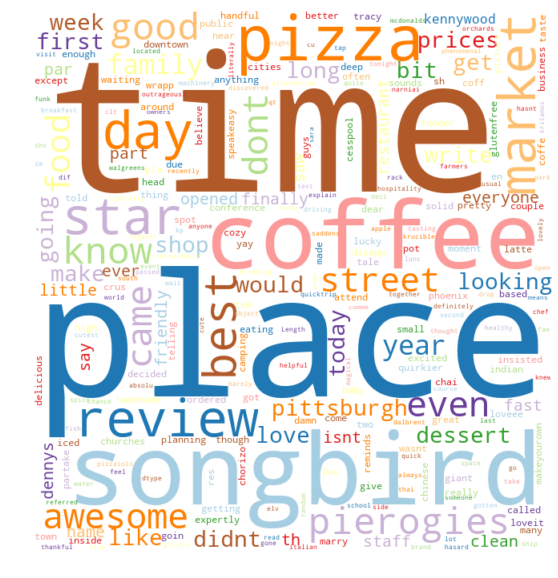

In [94]:
wordcloud_good = WordCloud(background_color = "white", colormap = "Paired",mask = thumbsup, 
                           width = 300, height = 200, scale=2,max_words=1000, 
                           stopwords=stopwords).generate(restaurant_good_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_good, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_good.to_file("restaurant_good.png")

#### Bad Reviews WordCloud

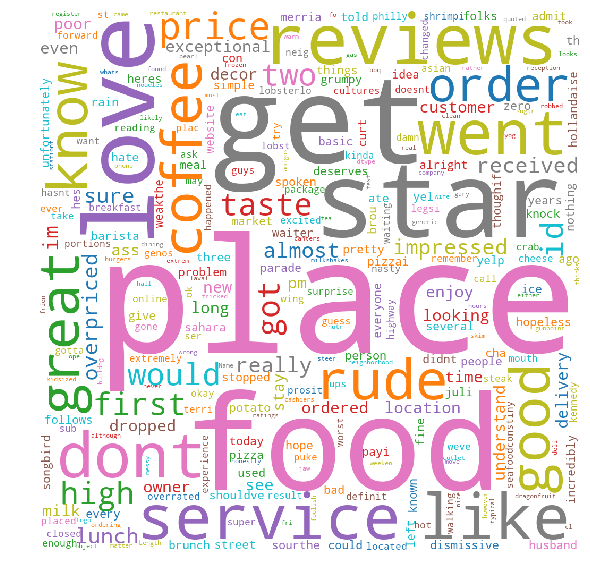

In [95]:
thumbsdown = np.array(Image.open(path.join(d,"thumbsdown.png")))
wordcloud_bad = WordCloud(background_color = 'white', colormap = 'tab10', mask = thumbsdown, 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(restaurant_bad_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_bad,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_bad.to_file('restaurant_bad.png')

#### Netural Reviews WordCloud

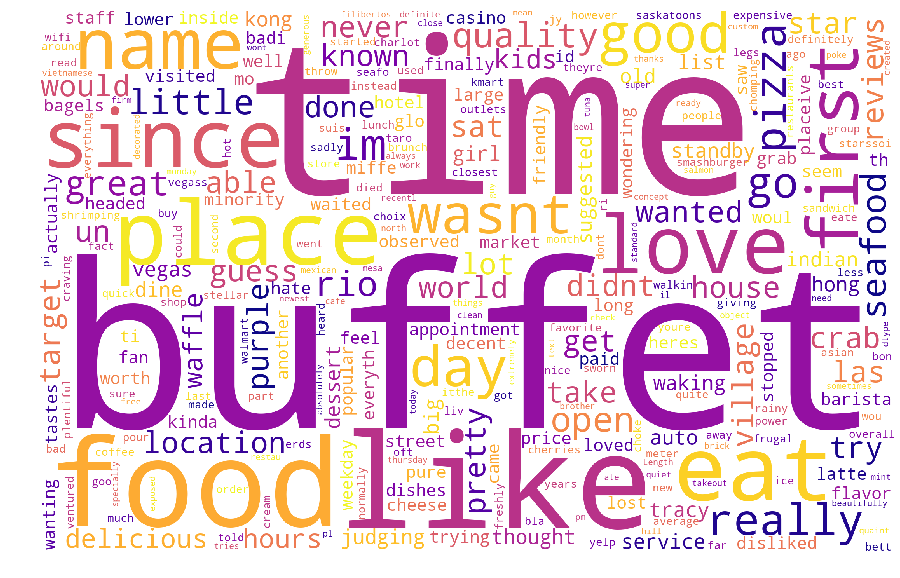

In [96]:
wordcloud_neu = WordCloud(background_color = 'white', colormap = "plasma", 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(restaurant_new_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_neu,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_neu.to_file('restaurant_neu.png')

### Service

In [97]:
service_good = service[service['CustomerEXP']== 'Good']
service_bad = service[service['CustomerEXP']== 'Bad']
service_neu = service[service['CustomerEXP']== 'Neutral']

In [98]:
service_good_docs = service_good['text'].str.lower().str.replace('[^A-Za-z ]','')
service_bad_docs = service_bad['text'].str.lower().str.replace('[^A-Za-z ]','')
service_neu_docs = service_neu['text'].str.lower().str.replace('[^A-Za-z ]','')

In [99]:
service_bad_ndocs=[]
for i in service_bad_docs:
    temp = str(i)
    if temp.isalnum():
        print(i)
    else:
        service_bad_ndocs.append(i)

service_bad_ndocs=pd.Series(service_bad_ndocs)

httpwwwazcentralcomnewsarticleschandlermoverssuedjudgmenthtml
nan
httpwwwazcentralcomnewsarticleschandlermoverssuedjudgmenthtml
httpwwwazfamilycomnewsconsumerphoenixfamilyclaimoutrageovercarpetcleaningbaitandswitchhtmlhttpwwwbbborgcentralnorthernwesternarizonabusinessreviewscarpetandrugcleanersprocarecarpetairductcleaningofarizonaincintempeaz


#### Good,Bad,Neutral Review Text Cleaning

In [100]:
service_good_clean = service_good_docs.apply(clean_sentence)

In [101]:
service_bad_clean = service_bad_ndocs.apply(clean_sentence)

In [102]:
service_neu_clean = service_neu_docs.apply(clean_sentence)

In [103]:
service_good_para = (str(service_good_clean))
service_bad_para = (str(service_bad_clean))
service_new_para = (str(service_neu_clean))

#### Good Reviews WordCloud

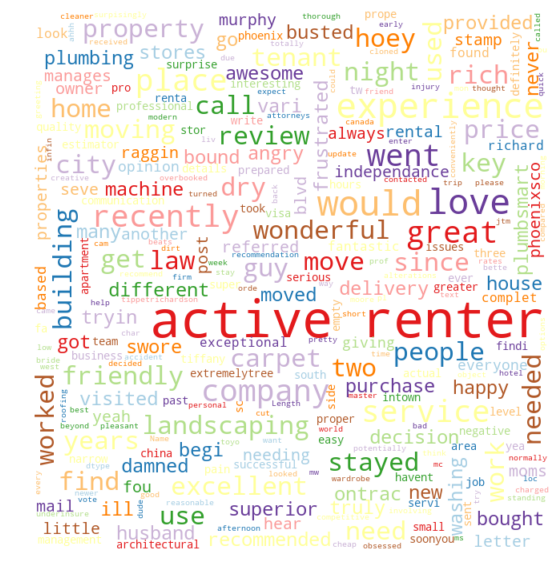

In [104]:
wordcloud_good = WordCloud(background_color = "white", colormap = "Paired",mask = thumbsup, 
                           width = 300, height = 200, scale=2,max_words=1000, 
                           stopwords=stopwords).generate(service_good_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_good, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_good.to_file("service_good.png")

#### Bad Reviews WordCloud

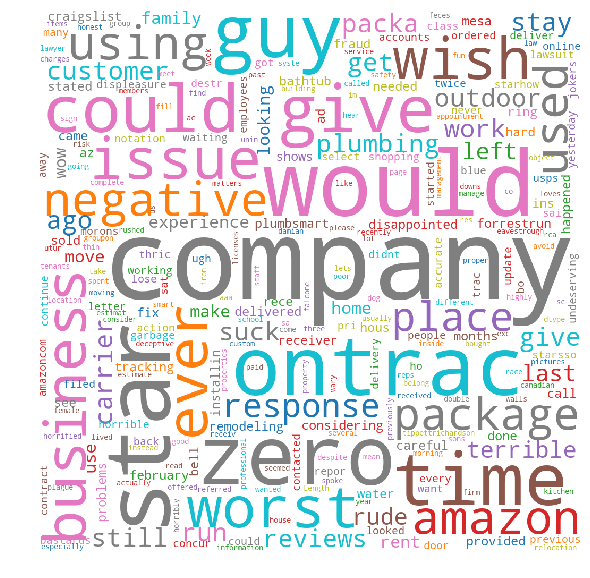

In [105]:
thumbsdown = np.array(Image.open(path.join(d,"thumbsdown.png")))
wordcloud_bad = WordCloud(background_color = 'white', colormap = 'tab10', mask = thumbsdown, 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(service_bad_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_bad,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_bad.to_file('service_bad.png')

#### Netural Reviews WordCloud

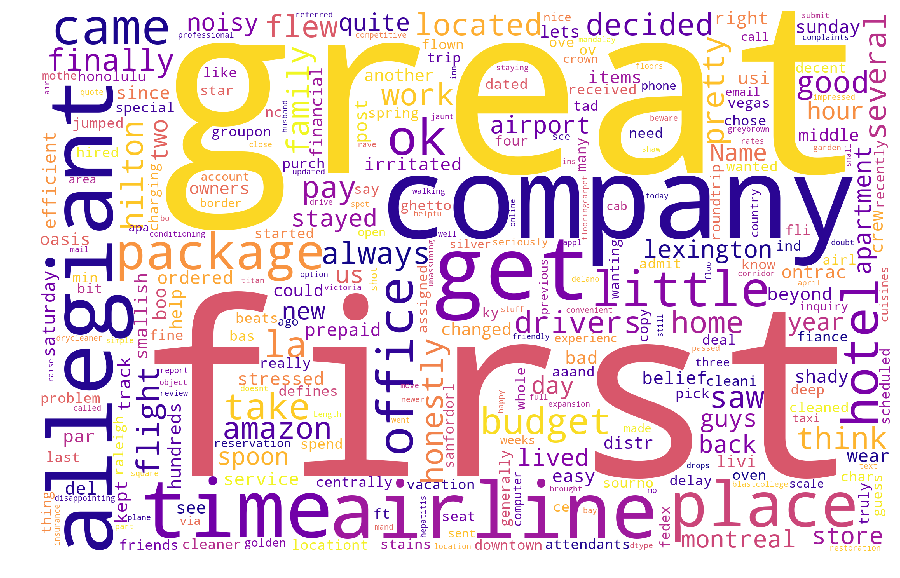

In [106]:
wordcloud_neu = WordCloud(background_color = 'white', colormap = "plasma", 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(service_new_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_neu,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_neu.to_file('service_neu.png')

### Shopping

In [107]:
shopping_good = shopping[shopping['CustomerEXP']== 'Good']
shopping_bad = shopping[shopping['CustomerEXP']== 'Bad']
shopping_neu = shopping[shopping['CustomerEXP']== 'Neutral']

In [108]:
shopping_good_docs = shopping_good['text'].str.lower().str.replace('[^A-Za-z ]','')
shopping_bad_docs = shopping_bad['text'].str.lower().str.replace('[^A-Za-z ]','')
shopping_neu_docs = shopping_neu['text'].str.lower().str.replace('[^A-Za-z ]','')

#### Good,Bad,Neutral Review Text Cleaning

In [109]:
shopping_good_clean = shopping_good_docs.apply(clean_sentence)

In [110]:
shopping_bad_clean = shopping_bad_docs.apply(clean_sentence)

In [111]:
shopping_neu_clean = shopping_neu_docs.apply(clean_sentence)

In [112]:
shopping_good_para = (str(shopping_good_clean))
shopping_bad_para = (str(shopping_bad_clean))
shopping_new_para = (str(shopping_neu_clean))

#### Good Reviews WordCloud

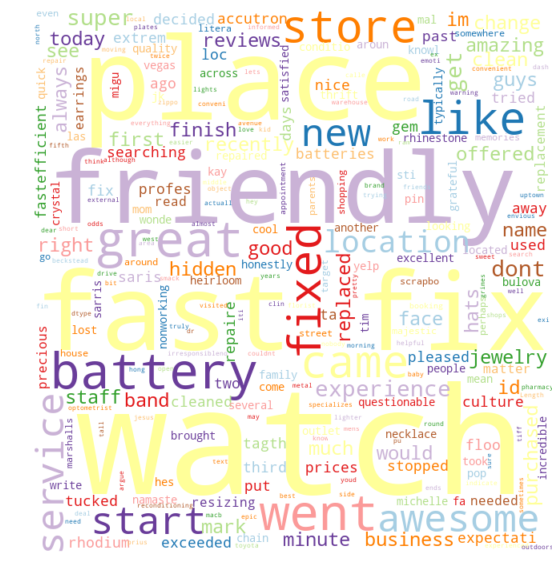

In [113]:
wordcloud_good = WordCloud(background_color = "white", colormap = "Paired",mask = thumbsup, 
                           width = 300, height = 200, scale=2,max_words=1000, 
                           stopwords=stopwords).generate(shopping_good_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_good, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_good.to_file("shopping_good.png")

#### Bad Reviews WordCloud

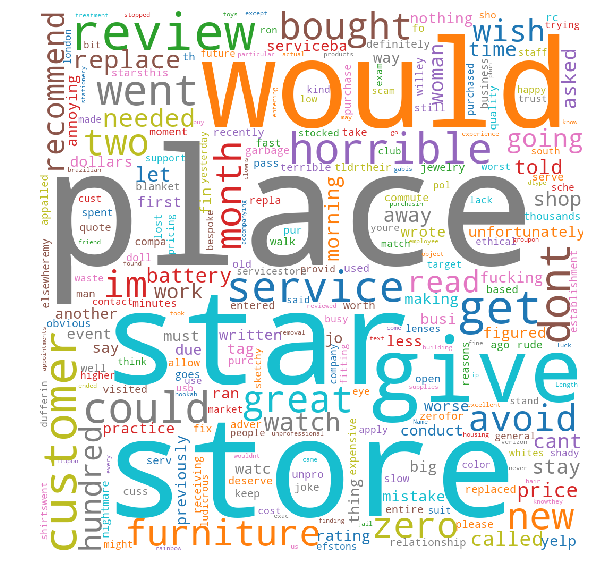

In [114]:
thumbsdown = np.array(Image.open(path.join(d,"thumbsdown.png")))
wordcloud_bad = WordCloud(background_color = 'white', colormap = 'tab10', mask = thumbsdown, 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(shopping_bad_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_bad,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_bad.to_file('shopping_bad.png')

#### Netural Reviews WordCloud

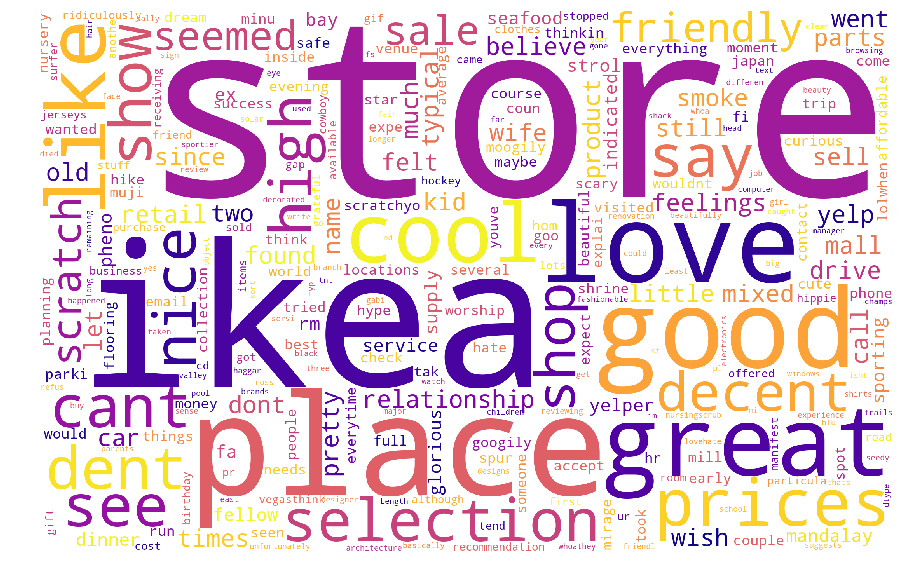

In [115]:
wordcloud_neu = WordCloud(background_color = 'white', colormap = "plasma", 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(shopping_new_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_neu,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_neu.to_file('shopping_neu.png')

### Medical

In [116]:
medical_good = medical[medical['CustomerEXP']== 'Good']
medical_bad = medical[medical['CustomerEXP']== 'Bad']
medical_neu = medical[medical['CustomerEXP']== 'Neutral']

In [117]:
medical_good_docs = medical_good['text'].str.lower().str.replace('[^A-Za-z ]','')
medical_bad_docs = medical_bad['text'].str.lower().str.replace('[^A-Za-z ]','')
medical_neu_docs = medical_neu['text'].str.lower().str.replace('[^A-Za-z ]','')

#### Good,Bad,Neutral Review Text Cleaning

In [118]:
medical_good_clean = medical_good_docs.apply(clean_sentence)

In [119]:
medical_bad_clean = medical_bad_docs.apply(clean_sentence)

In [120]:
medical_neu_clean = medical_neu_docs.apply(clean_sentence)

In [121]:
medical_good_para = (str(medical_good_clean))
medical_bad_para = (str(medical_bad_clean))
medical_new_para = (str(medical_neu_clean))

#### Good Reviews WordCloud

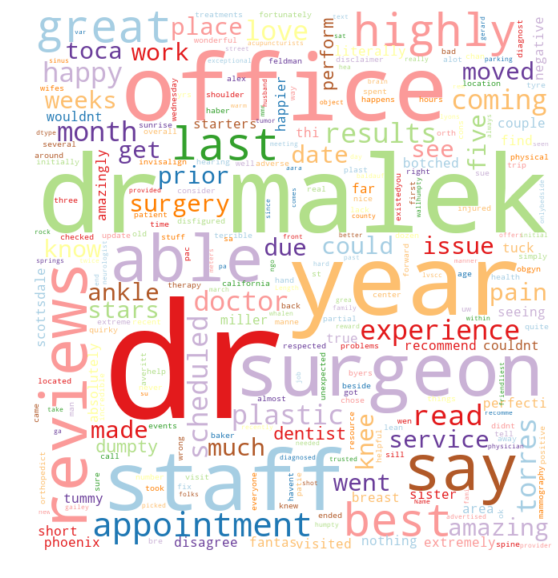

In [122]:
wordcloud_good = WordCloud(background_color = "white", colormap = "Paired",mask = thumbsup, 
                           width = 300, height = 200, scale=2,max_words=1000, 
                           stopwords=stopwords).generate(medical_good_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_good, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_good.to_file("medical_good.png")

#### Bad Reviews WordCloud

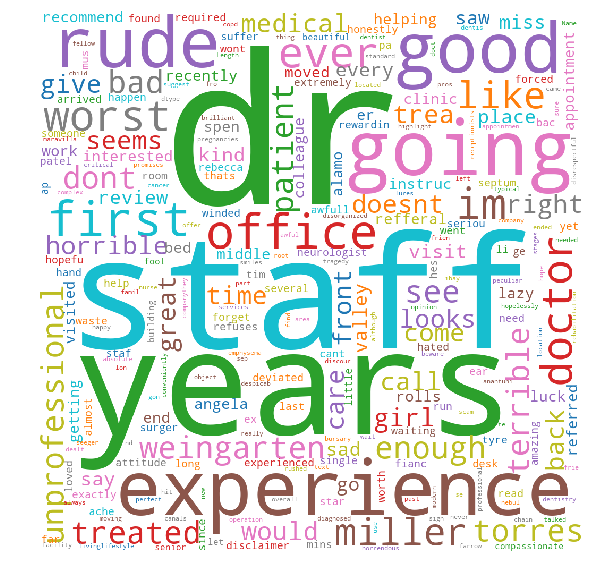

In [123]:
thumbsdown = np.array(Image.open(path.join(d,"thumbsdown.png")))
wordcloud_bad = WordCloud(background_color = 'white', colormap = 'tab10', mask = thumbsdown, 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(medical_bad_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_bad,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_bad.to_file('medical_bad.png')

#### Netural Reviews WordCloud

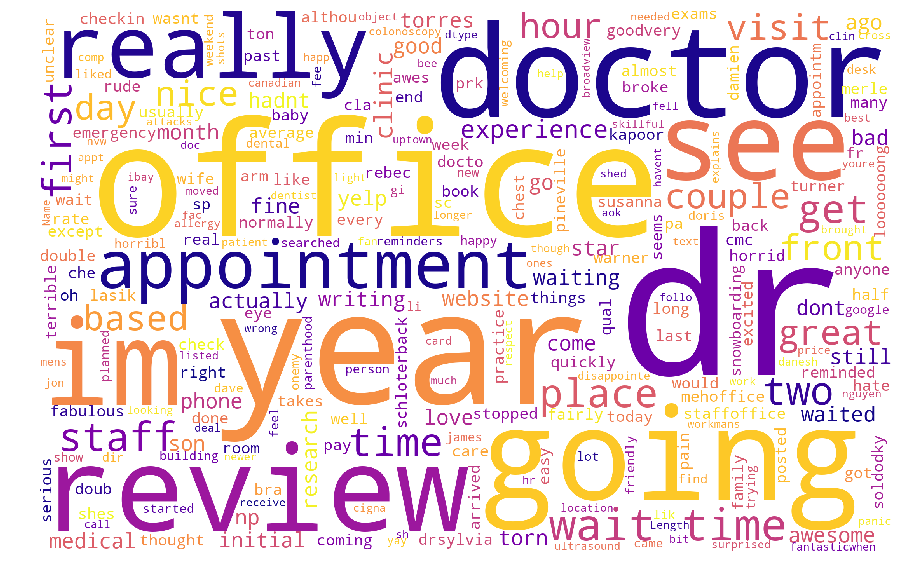

In [124]:
wordcloud_neu = WordCloud(background_color = 'white', colormap = "plasma", 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(medical_new_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_neu,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_neu.to_file('medical_neu.png')

### Fitness

In [125]:
fitness_good = fitness[fitness['CustomerEXP']== 'Good']
fitness_bad = fitness[fitness['CustomerEXP']== 'Bad']
fitness_neu = fitness[fitness['CustomerEXP']== 'Neutral']

In [126]:
fitness_good_docs = fitness_good['text'].str.lower().str.replace('[^A-Za-z ]','')
fitness_bad_docs = fitness_bad['text'].str.lower().str.replace('[^A-Za-z ]','')
fitness_neu_docs = fitness_neu['text'].str.lower().str.replace('[^A-Za-z ]','')

#### Good,Bad,Neutral Review Text Cleaning

In [127]:
fitness_good_clean = fitness_good_docs.apply(clean_sentence)

In [128]:
fitness_bad_clean = fitness_bad_docs.apply(clean_sentence)

In [129]:
fitness_neu_clean = fitness_neu_docs.apply(clean_sentence)

In [130]:
fitness_good_para = (str(fitness_good_clean))
fitness_bad_para = (str(fitness_bad_clean))
fitness_new_para = (str(fitness_neu_clean))

#### Good Reviews WordCloud

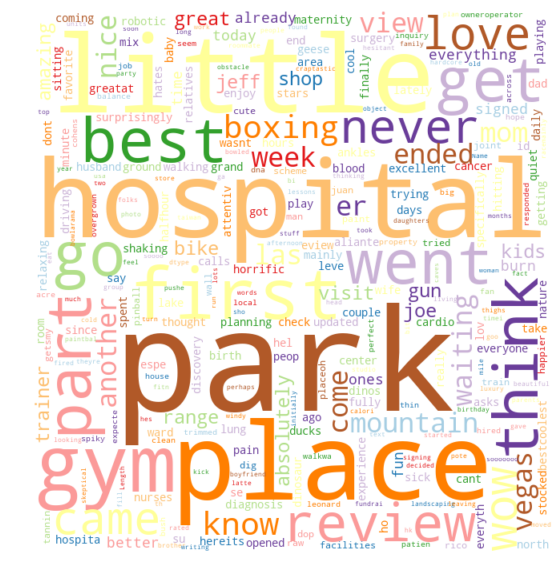

In [131]:
wordcloud_good = WordCloud(background_color = "white", colormap = "Paired",mask = thumbsup, 
                           width = 300, height = 200, scale=2,max_words=1000, 
                           stopwords=stopwords).generate(fitness_good_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_good, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_good.to_file("fitness_good.png")

#### Bad Reviews WordCloud

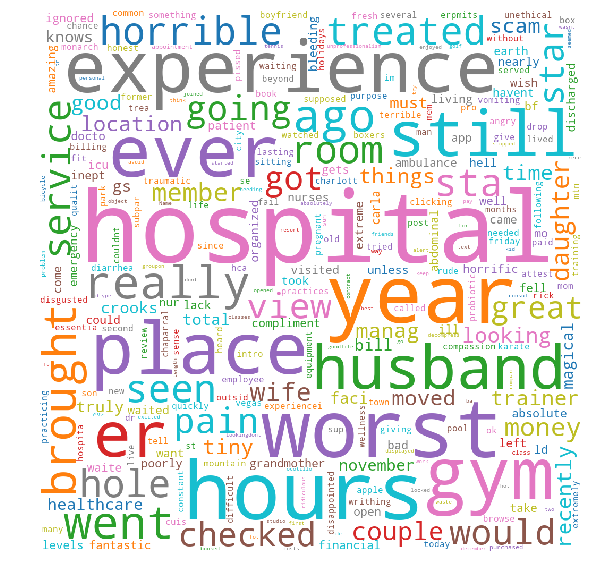

In [132]:
thumbsdown = np.array(Image.open(path.join(d,"thumbsdown.png")))
wordcloud_bad = WordCloud(background_color = 'white', colormap = 'tab10', mask = thumbsdown, 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(fitness_bad_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_bad,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_bad.to_file('fitness_bad.png')

#### Netural Reviews WordCloud

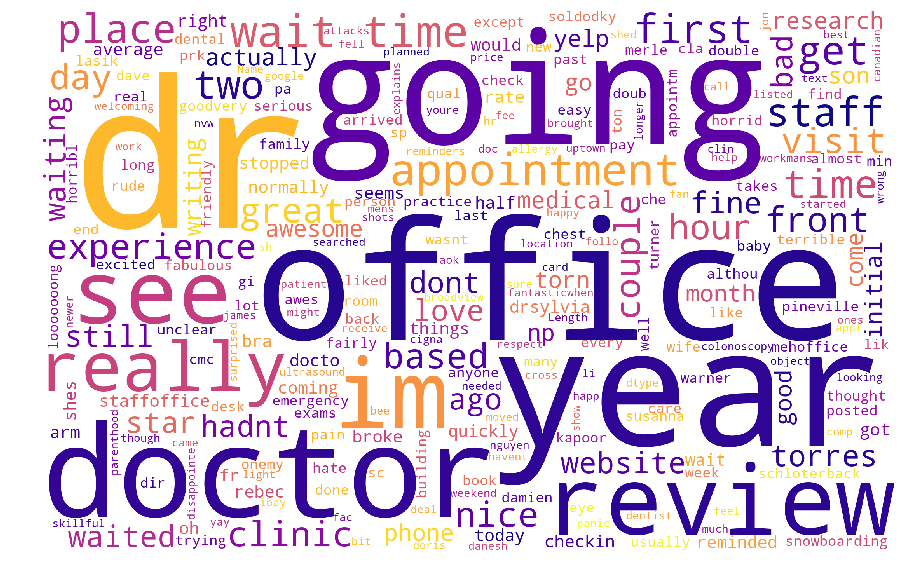

In [133]:
wordcloud_neu = WordCloud(background_color = 'white', colormap = "plasma", 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(medical_new_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_neu,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_neu.to_file('fitness_neu.png')

### Merging Review and Users

In [134]:
yelp_ru = pd.merge(yelp_review,yelp_users, on = 'user_id', how = 'inner')
yelp_ru.head()

business_id cool_x                 date  funny_x  \
0  ujmEBvifdJM6h6RLv4wQIg      0  2013-05-07 04:34:36      1.0   
1  hi85yAQhKmiNmwm_jzkCRA      0  2013-05-07 04:31:06      0.0   
2  b1b1eb3uo-w561D0ZfCEiQ      0  2018-01-30 23:07:38      0.0   
3  3fw2X5bZYeW9xCz_zGhOHg      5  2016-05-07 01:21:02      4.0   
4  uF86ZhygpBEGr3CudNemYA     10  2015-11-06 13:39:39      4.0   

                review_id  stars  \
0  Q1sbwvVQXV2734tPgoKj4Q    1.0   
1  alTTRUEPKEYf_VwqULWnBw    1.0   
2  11a8sVPMUFtaC7_ABRkmtw    1.0   
3  G7XHMxG0bx9oBJNECG4IFg    3.0   
4  PEkYyTrqRjXN5mOFBn5fzw    4.0   

                                                text  useful_x  \
0  Total bill for this horrible service? Over $8G...       6.0   
1  If you know what a clip joint is, these guys a...       4.0   
2  Today was my second out of three sessions I ha...       7.0   
3  Tracy dessert had a big name in Hong Kong and ...       5.0   
4  O'Noir was an awesome dining experience. I hav...      11.0   

                  user_id CustomerEXP  ...  compliment_writer  cool_y  \
0  hG7b0MtEbXx5QzbzE6C_VA         Bad  ...                  0       0   
1  hG7b0MtEbXx5QzbzE6C_VA         Bad  ...                  0       0   
2  ssoyf2_x0EQMed6fgHeMyQ         Bad  ...                  0       0   
3  jlu4CztcSxrKx56ba1a5AQ     Neutral  ...                 79    4067   
4  jlu4CztcSxrKx56ba1a5AQ        Good  ...                 79    4067   

                 elite  fans  \
0                  NaN     0   
1                  NaN     0   
2                  NaN     0   
3  2015,2016,2017,2018    83   
4  2015,2016,2017,2018    83   

                                             friends  funny_y    name  \
0                             frQs7y5qa-X1pvAM0sJe1w        4  Stefan   
1                             frQs7y5qa-X1pvAM0sJe1w        4  Stefan   
2  jrw1jRpoRgK6ZQ4Z5_hPng, GJgchmwqQghjuG14uWgIOA...        0  Reilly   
3  QAAWz02cj67-ndc1qqiS4g, vh9gbtiOgTgwTGAXBXWkXw...     2302  Kristy   
4  QAAWz02cj67-ndc1qqiS4g, vh9gbtiOgTgwTGAXBXWkXw...     2302  Kristy   

   review_count  useful_y        yelping_since  
0            10        18  2008-07-10 17:24:47  
1            10        18  2008-07-10 17:24:47  
2             2         7  2016-12-06 22:12:48  
3           600      4346  2015-06-18 22:57:20  
4           600      4346  2015-06-18 22:57:20  

[5 rows x 31 columns]

#### Null value calculation for the merged data set

In [135]:
yelp_ru.isnull().sum()

business_id                0
cool_x                     0
date                       0
funny_x                    0
review_id                  0
stars                      0
text                       1
useful_x                   0
user_id                    0
CustomerEXP                0
average_stars              0
compliment_cool            0
compliment_cute            0
compliment_funny           0
compliment_hot             0
compliment_list            0
compliment_more            0
compliment_note            0
compliment_photos          0
compliment_plain           0
compliment_profile         0
compliment_writer          0
cool_y                     0
elite                 330366
fans                       0
friends                    0
funny_y                    0
name                       0
review_count               0
useful_y                   0
yelping_since              0
dtype: int64

In [136]:
yelp_ru.shape

(665967, 31)

### Topic Modeling

### Tip data set

In [137]:
lemma = WordNetLemmatizer()

def clean_text(doc):
    corpus = []
    for c in range(0, doc.shape[0]):
        stop_free = ' '.join([i for i in doc[c].lower().split() if i not in set(stopwords)])
        puct_free = ''.join(i for i in stop_free if i not in set(string.punctuation))
        normalized = [lemma.lemmatize(word) for word in puct_free.split()]
        corpus.append(normalized)
    return corpus

In [138]:
tip_ndocs=[]
for i in yelp_tip['text']:
    temp = str(i)
    if temp.isalnum():
        print(i)
    else:
        tip_ndocs.append(i)

tip_ndocs=pd.Series(tip_ndocs)

No
Clean
Fan
Avicii
Wednesday
An
Saganaki
Closed
hopping
Consultation
Layover
Fantastic
PppppAaaaXxxx
KFC
Terrible
Suppp
Beer
Sssseemmmm
Karaoke
Grill
Fun
Triptych
Dont
Dietcoke
closed
Latte
Yumm
Meh
Yummmm
Wifi
Diesel
LOVE
Breakfast
Meh
Rude
Mmmmmm
Excited
Amazing
chuchhh
Pass
RCPM
Virus
Dinner
Awesome
Recharge
Tiesto
Beeeeeer
MI4
Antihistamines
19
Love
Breakfast
Closed
Farmers
Tweetgasm
Ugh
Ecofair
Unite
Woohoo
Specials
Vegas
Hop
X
Horrible
Refuel
R
BYOBooze
yummo
Classic
Mhn
Mmmhmmmm
MAGA
Yummy
Hi
Yum
Recommended
B
Yummy
Daughter
Yum
Smking
Closed
Fun
AYCE
SPD
Fhjfghfgg
Country
Excellent
Closed
Ve
Gets
Beer
Mmm
Awesome
Fab
Guacamole
Yum
Yummmmmm
Brunch
If
Running
Halal
Class
jammin
Worst
Home
Practice
Gas
Sucked
I
V
Dirty
Yum
Yum
Menu
coffee
closed
Wow
Mojito
salmon
Closed
Beeeeeer
Batman
Buffet
Kilroys
Yoo
Yum
Closed
Yuuuum
yesssss
Closed
Fancy
Photos
Closed
Focus
Hospital
wonderful
Yummy
Fabulous
Desserts
Yummmy
Fancy
Fantastic
Chillaxin
Always
Renfaire
Amazeballs
X
Yum
Expensive


Lunchtime
hawthorne
Love
Jackie
Happy
Smoothies
Lunch
Awesome
Barbacoa
Lunch
Miss
Guacamole
Beer
Mmmmmm
Closed
Poolside
Yum
Industry
Dinner
closed
Sucks
Carwash
Relaxing
Good
Practice
Mmmm
Oysters
Overhyped
Snacks
Ghetto
VHF
Best
English
Yummmmmm
Numi
Weekends
Pizza
FTW
ER
Mmmmm
Yuck
Numscious
Boba
Disgusting
Costco
Pho
Pizza
Yummy
deerhunter
Galanga
Bam
Tg
Great
Wow
Karaoke
Coffeeeeeee
Lol
Cheesesteak
Yummy
Moneyball
Yum
Home
Breakfast
Yum
Yum
T
Hhhh
icecream
Yum
Sushi
Amazing
BLT
Quiet
Closed
Prepping
AYCE
Yep
Boom
Beer
Endorush
coffee
Friendly
Ice
Closed
tonight
Shakeshakeshakeshake
Mmmmm
Prometheus
Narnia
No
O
Mmmmmmmmmm
Amazing
Terrible
closed
Foooooooooddddddd
Adious
Munchkins
Meh
Awesome
Ok
Slow
Nice
Fun
Rude
Finally
Mmmmmm
Peee
Yummm
bidness
Buffet
Deals
Yummy
Affordable
Lunch
closed
Bottles
Church
Unbelieveable
Yummy
Coffee
Pulled
Mmmmmmm
Present
Pamper
Good
Zl
Coffee
Delicious
Picnic
Omakase
Revueltas
Halal
Smoky
Closed
Bomb
Meh
Ugh
Awesome
Yummy
Thanks
b
S
relaxin
Frosty
Non

Deeeeeelish
Egypty
Mhm
Lines
Pregame
slurp
hehe
Smurftastic
Byofood
Yummmmmmm
Working
Beeeeeer
Coupons
Yummy
Bdjdjfmf
Lunch
Fireworks
Yummy
Ugh
Meeting
mortadella
shopping
Miam
Good
Wow
A
Soup
Adobada
Dinner
Mmmmmmmmmm
awseome
Beer
Yummy
Horrible
HH
Smileeeeee
tennis
closed
Awesome
PSL
Eggs
We
Nice
Yummm
Shopping
Closed
Love
Church
Mimosas
Pizza
Knifes
Amazing
Grub
Fun
Ramen
Delicious
Service
Lex
Working
Closed
Morillo
Drunkfah
300
Gjfh
Test
Supplies
Westwest
Grubbing
gremlins
LUCY
Yummy
Lol
Be
Avoid
Kimchiiiiii
Jogging
Qqwqqp
Closed
Pharmacy
Shopping
Yum
Fish
Sealer
Test
Crowded
Good
Sultani
Yum
Bootvamp
yassss
Gnocchi
Wow
Excellent
Ridic
Slow
Eh
Closed
Sesh
closed
Yummy
Mhm
Ok
Brunch
Fav
Sssssllllllloooooowwww
あけましておめでとうございます
Beer
Yum
LLLlalalLLLL
Lunch
G
Holler
nomz
56
So
Love
Lunch
whee
Yummo
Ugh
Yummmmm
Cool
Really
Sucks
B
Gaulvade
Delivery
Yum
Sangria
Inexpensive
Awesome
Sucks
Sundae
Bombbbbb
Cool
Brunch
Tm
Encore
Yep
OMG
Breakfast
Yes
Awesome
Wonderful
Dead
GOOD
Buzzzcation
Mmmm

Closed
Sasha
Sangria
Pancakes
Threads
Yummy
Busyyyyy
Prometheus
Brekkie
Mmmmm
Cafe
Yes
Lunch
Vg
Noms
Laksa
Canneles
Yessss
N
Mmmmmm
T
Word
Tasty
Tyy
Okay
Workshops
Yupp
Good
Mmmm
Nikeeeeeee
Poprox
fix
Scam
soso
Psychedelic
closed
Weekday
Again
BYOB
Hereafter
Workout
Yummy
yumm
Yumm
Movies
Margarita
Pastries
Lunch
Coffee
Ummmm
Awful
Noooooooooooooooooooo
Wooooweeeeee
Paigow
Gas
Closed
Wonderful
Dinner
Yelp
Tots
これ美味しい
Ok
rustica
closed
Avoid
Sale
Go
Nice
Heaven
Horrible
Good
Visiting
Omg
Variety
Yummy
Ehhh
Ftp
33
Needs
Teriyakiiiii
BYOB
Thanks
Beauty
Ok
Noisy
closed
Ehhhhh
Yummmm
G
Fabulous
High
MOM
Mmmm
Stars
Yes
Yoga
Octomom
Mhm
Ice
nan
Lunch
Yummmmmm
Rango
Favorite
Tah
VOTE
Ftgjll
Do
xoxoxo
Busssay
Scam
Blah
Ere
Fantastic
Closed
Work
Shjajs
Yum
Balling
Hours
Disgusting
Delicious
Good
Delicious
Filthy
Lunch
Awesome
Excellent
Delushous
Wifi
Delicious
Easy
Hungry
good
Gay
xoxo
Wings
Mmmm
Whoaaaa
Disgusting
今日は家族6人で焼肉パーティーです
Dinner
Ghg
Horrible
Awesome
Coffeeeeee
Yummy
Cocktails
Deliciou

Yum
Yummmyyy
Ttt
Yumm
Lunch
Nachos
INK
NTDM
Hoppin
Delicious
ChapLAX
Amazing
Disgusting
He
Spacious
Yummy
Books
Perfection
好吃
Now
Teppanaki
Working
caffeine
Yummy
Bathroom
Awful
Shopping
Lunch
Good
Ghetto
Four
Dinner
U
Yummmm
Yumm
Wifi
Drooooooool
Grubbin
Mmm
closed
Swank
A
Bomb
Margarita
Cx
Yummay
Ghetto
bad
Yummm
Closed
HR
Delicioso
Yummy
Brunch
Test
Terrible
Yumm
no
GrindN
Rude
Avoid
Yummmm
Gross
Mmmmmmmmmmm
Smells
Delicious
Trapn
Lunch
Excellent
Lunch
Cozy
Legit
Working
L
Yea
Favorite
Wangs
Ccool
TweetMeetTO
T
Mmm
Disappointed
Gas
Awesome
Hmm
Muppets
Dancing
y0
Bootcamp
Great
S
Amazing
Good
Yummmmmmmnnnnn
Yumny
Really
Mmmm
Overpriced
Comfortable
Gel
Horrible
Lunch
Last
1
Yummy
closed
Again
Closed
Delicious
Awesome
Amazing
Very
I
protein
Bre
Tacoes
Shitty
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Awesome
Closed
Ok
Awesome
Pho
Movietime
S
C
BOMB
V
Busy
Good
Yummmm
Nice
Fff
Love
hood
Wow
Lol
Great
Delicious
Good
Awesomeness
Hedonistic
Yum
A
BossN
Closed
Helpful
Ok
Crooks
Decadent
SOPES
Fo

Yummy
Wow
SALÁD
Megaminds
Lunch
SC
Yummy
Tkb
Closed
Gas
Dinner
Eh
Great
D4
Amazing
TGIF
Good
Closed
Tkb
Vegasy
closed
Nightcap
Terrible
Yayayaya
Meetings
Breakfest
Awesomeness
Ouch
yup
Great
y
Beautiful
NAB
Lunch
Like
Combination
Again
Yum
Cosmo
Wings
Awesome
Caffeine
Mmmmmm
Bomb
Shdud
Zumba
Amazing
Closed
Gross
Meh
Mmmmmmm
Pistachio
Yuck
Here
delicioso
Poolside
Believe
兰州拉面棒棒哒
Love
Pharmacy
Zumba
Cannolis
Good
Fancy
Bommmbbb
Trash
Closed
Cinco
An
Closed
Delicious
Harp
Wednesday
Yummmmmmmm
Good
Yummy
Tkb
Ih
A
Stop
Lovely
I
Fish
Disgusting
Dope
Yummy
Bufffettt
Good
Cuckoo
Okay
Yum
Ceeegars
Yum
Drink
Hhb
Addict
Awesome
Yum
honest
Goood
Hayah
Rude
Coffee
P
Grubbin
Ice
W
Bittersweet
Mmmm
Amazing
Poop
BeSDT
Yummmm
Word
Yum
Yummy
MAGIC
Lunch
A
Marquee
Zumba
Aa
Bombbbbbb
Horrible
Back
Idiors
Yummm
Yum
Amazing
Tapas
Jk
Zumba
TBD
Horrible
NomNoms
Menu
Jobfair
Goood
Yum
Haha
Best
Amazing
bibimbappp
Mmmmmmm
bld
closed
Great
Bangn
Chippindales
Gxhdhcb
Amazing
Tacos
Shipping
Beautiful
Tony
Good
Lik

Yahoo
BNI
Excellent
Great
Nice
Beignets
Oops
Crackin
Sunrise
Closed
Lol
Limitless
Foodgasm
Yummmmm
Packed
Amazingggggggg
LEM
Good
Thematic
Sketchy
Amazing
Again
Bomb
Closed
Yumm
Blech
Sucks
Expendable
Superbowl
EDC
Groceries
0
Yummy
Fine
Um
amazing
Terrible
Excellent
Hmmmm
Aaaahhhhhhhh
Bombbbbbb
Again
Showtime
O
Meh
Great
Exceptional
Stinge
Soup
J
racist
Yummy
Yummmm
Drunk
Yum
Yummy
Rehydrate
Lunch
Uhoh
Yummy
Big
K
Yum
Yum
Closed
Yumm
Mmmmm
Good
Peepshow
ttyyy
Wild
Nice
Crepes
Smiling
Woot
Peaceful
Yum
Redwood
Yummy
Mmmmm
Bar
Candy
Home
Mezzanine
Closed
Yummy
Stripprr
Hahaha
Trendy
titties
Yessir
Wonderful
Check
Pass
Bomb
Dinner
Closed
Saketini
No
Working
Perfect
Yum
Legit
Unbelievable
Avoid
D
closed
Qq
q
Moved
Poutiiine
Dinner
Yum
Slurppies
Yummy
Good
Simple
Amaaaze
S
Great
tttt
Awesome
Woot
Makkoli
Yummm
Woohoo
Yaazzzzzz
Overrated
V
Delicious
Ribs
Yuum
horrible
Mmmmm
Good
henh
Snacks
Yummy
Lunch
Coffee
Disappointing
Grubbin
Yummy
Yummy
Oo
Good
lol
Pho
Bleh
Excellent
Closed
Great
Ok
A

Crackin
Ok
Csb
Disgusting
Yummmm
Yummm
De
Csb
Poor
Yum
Amazing
Horrible
Awesome
Juicy
Yelp
The
Awesome
Desayuno
Yummy
X
Amazing
Tasty
best
Hoopin
Pooods
Dinner
Bliss
Nope
Awesome
Plush
uggggghhhhhhhhhhhhhhhhhh
Awesome
Dndmdmdm
Great
Darts
Blah
Closed
Hello
Favorite
Shopping
Celebrating
Closed
Grubbing
Mmmmmmmm
Yum
Closed
Ok
Brisket
Closed
Booring
Perfection
Tip
Yayyy
Fuueredr
Perfect
3d
BoofetBoofet
Yum
5
Yummay
closed
Horrible
Yay
Holdem
Juicy
Omg
Meh
1
Awesome
Boigers
Hunnnngry
Shopping
Tasty
Done
closed
T
Food
Trash
Hdjfhdjjdhfjdofjjfnrjkofkforojfjfkdhsueidgxbdjddj
Shopping
A
Gametime
Awesome
Excellent
S
いつきても美味しくて良いですね
Brunch
Onolicious
Swagu
Gorgeous
Shmoodies
Hoopin
Italian
Brilliant
Dinner
Just
Poolside
Dacos
Awesome
Hours
Love
Riquisima
Smoooodies
Omg
Awwwesome
Awesome
mouthwatering
Yummy
Aaahhhhh
Food
nice
Yummy
Tasty
Zzz
Mmm
mmmmm
Brunch
Xghggguuyiihoknmonmmnnnnnnnnnnmmnnnmnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnmmmlllkll
delicious
Yummmy
Vegas
Homeward
Y
Yummy

M
Stromboli
Yuck
Delicious
Ha
Breakfast
Delicious
Yikes
Uni
Liiiitttttt
closed
Avoid
Ahhhhhhhhh
Mmmmmmmm
Dinner
GOOD
Carelessness
Yummy
Edc
Awesome
SUcks
Great
Uni
Uni
Fantastic
Gyu
Grindaholic
Pho
Holla
Mmmm
Airport
TGIF
Rkpyjkj
Yum
scrumptulescent
Mousseux
Refuel
Wonderful
Earshotwsdds
madhouse
Zewo
Mmmm
Thanks
Gyu
Avoid
Yummy
Good
Brewery
Awesome
Delicious
Ddserfg
Amazing
Excellent
Absinthe
Yuck
Test
Uni
Fast
Excellent
Perfecto
Yummy
Bomb
Vvvtv
Langostines
Yum
I
Lavish
Awesome
Gooood
M
Screwe
Tv
Jxhxhhhhsisjgfggoooppkk
Closed
Great
Awesome
Pizzapizzapizza
Delicious
Uni
Carpet
007
Thanks
Gooood
Awesome
Delicious
Dankiesss
Part2
Great
Yummy
Gooooooood
Mmmm
The
Yummy
Terrible
Touchdown
Decent
Closed
Lunch
Chingon
Hunger
BYOB
William
Lunch
Possession
H
Yummmm
Aw
Amazing
Ngl
Li
On
Omiyage
awesome
Beautiful
Yummmmy
Awesome
Yummmmm
Part2
Working
Yum
Delicious
Omg
Pool
Gorgeous
Weeeee
Dinner
Inside
Impressive
Uni
Great
Mmmmm
Awesome
Hanging
Carpet
Yummy
good
Uni
Busyyyyyyy
Yeet
Awesome
Croq

In [139]:
doc_tip = clean_text(tip_ndocs)

In [140]:
dictionary_tip = corpora.Dictionary(doc_tip)
doc_term_matrix_tip = [dictionary_tip.doc2bow(doc) for doc in doc_tip]
ldamodel_tip = gensim.models.ldamodel.LdaModel(doc_term_matrix_tip,
                                               num_topics= 3, 
                                                       id2word= dictionary_tip, passes=20)

In [141]:
for topic in ldamodel_tip.show_topics(num_topics=5, formatted=False, num_words= 5):
    print('Topic {}: words'.format(topic[0]))
    topic_word_tip = [w for (w,val) in topic[1]]
    print(topic_word_tip)

Topic 0: words
['great', 'food', 'good', 'service', 'best']
Topic 1: words
['time', 'go', 'place', 'back', 'service']
Topic 2: words
['get', 'hour', 'wait', 'day', 'happy']


#### Top topic in Tip dataset

In [142]:
tp_tip = ldamodel_tip.top_topics(doc_term_matrix_tip,topn=20,dictionary=dictionary_tip)

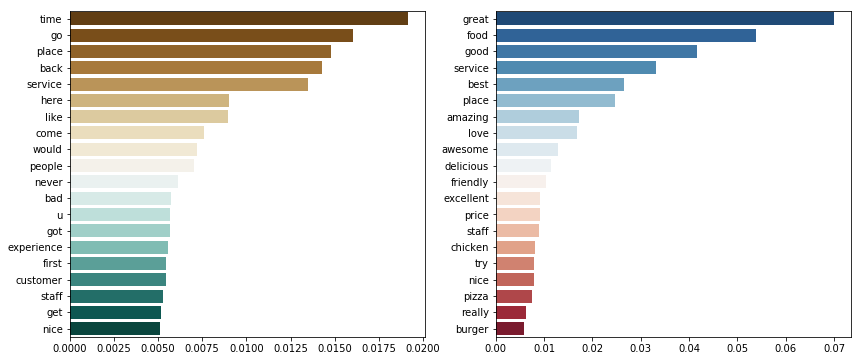

In [143]:
label_tip = [] 
value_tip = []

f,ax = plt.subplots(1,2,figsize = (14,6))
ax1.set_title(tp_tip[0])
ax1,ax2 = ax.flatten()
for i,k in tp_tip[0][0]:
    label_tip.append(i)
    value_tip.append(k)
sns.barplot(label_tip,value_tip,palette='BrBG', ax=ax1)

label_tp_tip = [] 
value_tp_tip = []
for i,k in tp_tip[1][0]:
    label_tp_tip.append(i)
    value_tp_tip.append(k)
sns.barplot(label_tp_tip,value_tp_tip,palette='RdBu_r', ax= ax2);

### Review Data set

In [144]:
lemma_rev = WordNetLemmatizer()

def clean_text_rev(doc):
    corpus = []
    for c in range(0, doc.shape[0]):
        stop_free = ' '.join([i for i in doc[c].lower().split() if i not in set(stopwords)])
        puct_free = ''.join(i for i in stop_free if i not in set(string.punctuation))
        normalized = [lemma_rev.lemmatize(word) for word in puct_free.split()]
        corpus.append(normalized)
    return corpus

In [145]:
review_ndocs=[]
for i in yelp_review['text']:
    temp = str(i)
    if temp.isalnum():
        print(i)
    else:
        review_ndocs.append(i)

review_ndocs=pd.Series(review_ndocs)

updated
Neither
RIP
Sucks
nan
Updated
nan
Ghhhh
Hood
nan
Snickelfritz
O


In [146]:
doc_review = clean_text_rev(review_ndocs)

In [147]:
dictionary_review = corpora.Dictionary(doc_review)
doc_term_matrix_review = [dictionary_review.doc2bow(doc) for doc in doc_review]
ldamodel_review = gensim.models.ldamodel.LdaModel(doc_term_matrix_review, num_topics= 3, 
                                                  id2word= dictionary_review,
                                                  passes=20)

In [148]:
for topic in ldamodel_review.show_topics(num_topics=5, formatted=False, num_words= 5):
    print('Topic {}: words'.format(topic[0]))
    topic_word = [w for (w,val) in topic[1]]
    print(topic_word)

Topic 0: words
['would', 'time', 'get', 'back', 'service']
Topic 1: words
['food', 'good', 'place', 'like', 'restaurant']
Topic 2: words
['place', 'like', 'room', 'get', 'time']


#### Top topic in Review dataset

In [149]:
tp_review = ldamodel_review.top_topics(doc_term_matrix_review,topn=20,dictionary=dictionary_review)

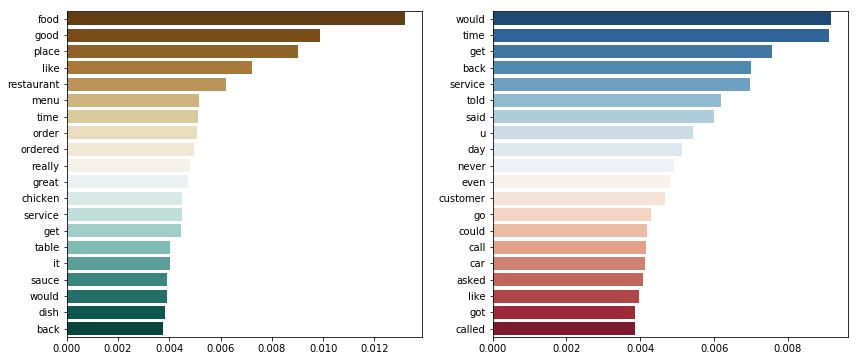

In [150]:
label_review = [] 
value_review = []

f,ax = plt.subplots(1,2,figsize = (14,6))
ax1.set_title(tp_review[0])
ax1,ax2 = ax.flatten()
for i,k in tp_review[0][0]:
    label_review.append(i)
    value_review.append(k)
sns.barplot(label_review,value_review,palette='BrBG', ax=ax1)

label_review = [] 
value_review = []
for i,k in tp_review[1][0]:
    label_review.append(i)
    value_review.append(k)
sns.barplot(label_review,value_review,palette='RdBu_r', ax= ax2);

### Merging Review,Business and Users dataset

In [151]:
yelp_rbu = pd.merge(yelp_ru, yelp_business, on = 'business_id', how = 'inner')
yelp_rbu.head()

business_id cool_x                 date  funny_x  \
0  ujmEBvifdJM6h6RLv4wQIg      0  2013-05-07 04:34:36      1.0   
1  ujmEBvifdJM6h6RLv4wQIg      1  2012-08-17 21:58:24      0.0   
2  ujmEBvifdJM6h6RLv4wQIg      6  2011-03-14 00:23:12      3.0   
3  ujmEBvifdJM6h6RLv4wQIg      1  2015-02-22 02:52:26      3.0   
4  ujmEBvifdJM6h6RLv4wQIg      0  2012-07-08 22:12:41      1.0   

                review_id  stars_x  \
0  Q1sbwvVQXV2734tPgoKj4Q      1.0   
1  8F9500ycq3mvpjf0glbFFg      3.0   
2  _2_WR2PZHWt_N5IhkjFWbw      4.0   
3  jxjvu8zMuIIItx7r49EE4A      3.0   
4  h_-p8Fs8Kf9dGKFnySVxpA      2.0   

                                                text  useful_x  \
0  Total bill for this horrible service? Over $8G...       6.0   
1  Nursing staff is ok.  I'm still a bit leary ab...       8.0   
2  My Mom spent a couple of days in this hospital...      11.0   
3  I came here for an outpatient test procedure. ...       7.0   
4  I had to get my man to a Hospital and this one...      10.0   

                  user_id CustomerEXP  ...  \
0  hG7b0MtEbXx5QzbzE6C_VA         Bad  ...   
1  tH0uKD-vNwMoEc3Xk3Cbdg     Neutral  ...   
2  QJI9OSEn6ujRCtrX06vs1w        Good  ...   
3  m-BZLIIh5PCAKnzH0qj_0Q     Neutral  ...   
4  Fv0e9RIV9jw5TX3ctA1WbA         Bad  ...   

                                               hours  is_open   latitude  \
0  {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...        1  36.215546   
1  {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...        1  36.215546   
2  {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...        1  36.215546   
3  {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...        1  36.215546   
4  {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...        1  36.215546   

    longitude                 name_y  postal_code  review_count_y  stars_y  \
0 -115.248798  MountainView Hospital        89128             238      2.5   
1 -115.248798  MountainView Hospital        89128             238      2.5   
2 -115.248798  MountainView Hospital        89128             238      2.5   
3 -115.248798  MountainView Hospital        89128             238      2.5   
4 -115.248798  MountainView Hospital        89128             238      2.5   

   state  cat_desc  
0     NV   Fitness  
1     NV   Fitness  
2     NV   Fitness  
3     NV   Fitness  
4     NV   Fitness  

[5 rows x 45 columns]

#### Null value calculation for the merged data set 

In [152]:
yelp_rbu.isnull().sum()

business_id                0
cool_x                     0
date                       0
funny_x                    0
review_id                  0
stars_x                    0
text                       1
useful_x                   0
user_id                    0
CustomerEXP                0
average_stars              0
compliment_cool            0
compliment_cute            0
compliment_funny           0
compliment_hot             0
compliment_list            0
compliment_more            0
compliment_note            0
compliment_photos          0
compliment_plain           0
compliment_profile         0
compliment_writer          0
cool_y                     0
elite                 330366
fans                       0
friends                    0
funny_y                    0
name_x                     0
review_count_x             0
useful_y                   0
yelping_since              0
address                12592
attributes             42699
categories                 0
city          

In [153]:
yelp_rbu.shape

(665967, 45)

In [154]:
yelp_rbu.columns

Index(['business_id', 'cool_x', 'date', 'funny_x', 'review_id', 'stars_x',
       'text', 'useful_x', 'user_id', 'CustomerEXP', 'average_stars',
       'compliment_cool', 'compliment_cute', 'compliment_funny',
       'compliment_hot', 'compliment_list', 'compliment_more',
       'compliment_note', 'compliment_photos', 'compliment_plain',
       'compliment_profile', 'compliment_writer', 'cool_y', 'elite', 'fans',
       'friends', 'funny_y', 'name_x', 'review_count_x', 'useful_y',
       'yelping_since', 'address', 'attributes', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name_y', 'postal_code',
       'review_count_y', 'stars_y', 'state', 'cat_desc'],
      dtype='object')

In [155]:
yelp_rbu.drop(['cool_x','funny_x','average_stars','compliment_cool','compliment_cute','compliment_funny',
               'compliment_hot','compliment_list','compliment_more','compliment_note','compliment_photos',
               'compliment_plain','compliment_profile', 'compliment_writer', 'cool_y', 'elite','funny_y',
               'yelping_since','address','attributes','hours','latitude','longitude','postal_code','date',
               'useful_x','is_open'],axis = 1, inplace = True)

In [156]:
yelp_rbu.shape

(665967, 18)

In [157]:
yelp_rbu.head()

business_id               review_id  stars_x  \
0  ujmEBvifdJM6h6RLv4wQIg  Q1sbwvVQXV2734tPgoKj4Q      1.0   
1  ujmEBvifdJM6h6RLv4wQIg  8F9500ycq3mvpjf0glbFFg      3.0   
2  ujmEBvifdJM6h6RLv4wQIg  _2_WR2PZHWt_N5IhkjFWbw      4.0   
3  ujmEBvifdJM6h6RLv4wQIg  jxjvu8zMuIIItx7r49EE4A      3.0   
4  ujmEBvifdJM6h6RLv4wQIg  h_-p8Fs8Kf9dGKFnySVxpA      2.0   

                                                text                 user_id  \
0  Total bill for this horrible service? Over $8G...  hG7b0MtEbXx5QzbzE6C_VA   
1  Nursing staff is ok.  I'm still a bit leary ab...  tH0uKD-vNwMoEc3Xk3Cbdg   
2  My Mom spent a couple of days in this hospital...  QJI9OSEn6ujRCtrX06vs1w   
3  I came here for an outpatient test procedure. ...  m-BZLIIh5PCAKnzH0qj_0Q   
4  I had to get my man to a Hospital and this one...  Fv0e9RIV9jw5TX3ctA1WbA   

  CustomerEXP  fans                                            friends  \
0         Bad     0                             frQs7y5qa-X1pvAM0sJe1w   
1     Neutral   251  yjT7lRM1uHWERITm5qy8Vg, Ezj4B5x1wJp6LxiFJptbfw...   
2        Good   293  SDytcPY5fiuuDbTkPE8GyA, Pn4W0F3wc6B5fAEwpKY0rQ...   
3     Neutral    88  aWggU2ElzsAlotZw-XxgXA, uERlyO-ASZag6XXouCrkhg...   
4         Bad   309  9GhiQOLaM6ZGrrFG-SppwQ, 7RLTk4rftgaUIDSau7RLTA...   

     name_x  review_count_x  useful_y  \
0    Stefan              10        18   
1     Cathy            1184      7176   
2         J            1982     14163   
3    Sheila             734      3969   
4  Christie             858     27129   

                                          categories       city  \
0  Fitness & Instruction, Doctors, Health & Medic...  Las Vegas   
1  Fitness & Instruction, Doctors, Health & Medic...  Las Vegas   
2  Fitness & Instruction, Doctors, Health & Medic...  Las Vegas   
3  Fitness & Instruction, Doctors, Health & Medic...  Las Vegas   
4  Fitness & Instruction, Doctors, Health & Medic...  Las Vegas   

                  name_y  review_count_y  stars_y state cat_desc  
0  MountainView Hospital             238      2.5    NV  Fitness  
1  MountainView Hospital             238      2.5    NV  Fitness  
2  MountainView Hospital             238      2.5    NV  Fitness  
3  MountainView Hospital             238      2.5    NV  Fitness  
4  MountainView Hospital             238      2.5    NV  Fitness

### Ranking The Reviewers

In [158]:
yelp_rbu['rank_score'] = yelp_rbu.fans*0.3 + yelp_rbu.useful_y*0.4 + yelp_rbu.review_count_x*0.3

In [159]:
yelp_rbu.head()

business_id               review_id  stars_x  \
0  ujmEBvifdJM6h6RLv4wQIg  Q1sbwvVQXV2734tPgoKj4Q      1.0   
1  ujmEBvifdJM6h6RLv4wQIg  8F9500ycq3mvpjf0glbFFg      3.0   
2  ujmEBvifdJM6h6RLv4wQIg  _2_WR2PZHWt_N5IhkjFWbw      4.0   
3  ujmEBvifdJM6h6RLv4wQIg  jxjvu8zMuIIItx7r49EE4A      3.0   
4  ujmEBvifdJM6h6RLv4wQIg  h_-p8Fs8Kf9dGKFnySVxpA      2.0   

                                                text                 user_id  \
0  Total bill for this horrible service? Over $8G...  hG7b0MtEbXx5QzbzE6C_VA   
1  Nursing staff is ok.  I'm still a bit leary ab...  tH0uKD-vNwMoEc3Xk3Cbdg   
2  My Mom spent a couple of days in this hospital...  QJI9OSEn6ujRCtrX06vs1w   
3  I came here for an outpatient test procedure. ...  m-BZLIIh5PCAKnzH0qj_0Q   
4  I had to get my man to a Hospital and this one...  Fv0e9RIV9jw5TX3ctA1WbA   

  CustomerEXP  fans                                            friends  \
0         Bad     0                             frQs7y5qa-X1pvAM0sJe1w   
1     Neutral   251  yjT7lRM1uHWERITm5qy8Vg, Ezj4B5x1wJp6LxiFJptbfw...   
2        Good   293  SDytcPY5fiuuDbTkPE8GyA, Pn4W0F3wc6B5fAEwpKY0rQ...   
3     Neutral    88  aWggU2ElzsAlotZw-XxgXA, uERlyO-ASZag6XXouCrkhg...   
4         Bad   309  9GhiQOLaM6ZGrrFG-SppwQ, 7RLTk4rftgaUIDSau7RLTA...   

     name_x  review_count_x  useful_y  \
0    Stefan              10        18   
1     Cathy            1184      7176   
2         J            1982     14163   
3    Sheila             734      3969   
4  Christie             858     27129   

                                          categories       city  \
0  Fitness & Instruction, Doctors, Health & Medic...  Las Vegas   
1  Fitness & Instruction, Doctors, Health & Medic...  Las Vegas   
2  Fitness & Instruction, Doctors, Health & Medic...  Las Vegas   
3  Fitness & Instruction, Doctors, Health & Medic...  Las Vegas   
4  Fitness & Instruction, Doctors, Health & Medic...  Las Vegas   

                  name_y  review_count_y  stars_y state cat_desc  rank_score  
0  MountainView Hospital             238      2.5    NV  Fitness        10.2  
1  MountainView Hospital             238      2.5    NV  Fitness      3300.9  
2  MountainView Hospital             238      2.5    NV  Fitness      6347.7  
3  MountainView Hospital             238      2.5    NV  Fitness      1834.2  
4  MountainView Hospital             238      2.5    NV  Fitness     11201.7

#### Getting the Top words

In [167]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(3, 3), max_df=1.0, min_df=1, max_features=None).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

### Business Type Ranking of Reviewers

#### Restaurants

In [160]:
yelp_restaurant = yelp_rbu[yelp_rbu['cat_desc']=='Restaurant']
yelp_restaurant.head()

business_id               review_id  stars_x  \
92  3fw2X5bZYeW9xCz_zGhOHg  G7XHMxG0bx9oBJNECG4IFg      3.0   
93  3fw2X5bZYeW9xCz_zGhOHg  K_lns-1rpjbXfPPCcqEPKg      3.0   
94  3fw2X5bZYeW9xCz_zGhOHg  8TDAPlpzEmTZSYUG78yGSQ      4.0   
95  3fw2X5bZYeW9xCz_zGhOHg  uIMfdNHxELOgdU-7pxyfTQ      2.0   
96  3fw2X5bZYeW9xCz_zGhOHg  aMIzcG9vInP1LJnBs2pNdg      4.0   

                                                 text                 user_id  \
92  Tracy dessert had a big name in Hong Kong and ...  jlu4CztcSxrKx56ba1a5AQ   
93  I would have never known! Judging by the name,...  5El0VTbAb-s0PgIcVbS6Kg   
94  3.5 stars. Tracy Dessert 許留山 is small cozy Chi...  QPJJohtGqkMkaN0Gt3TRIg   
95  First off, the two stars is for their food whi...  UjlxYJV938_3Mp180aNAqw   
96  This dessert shop has been around for a long t...  eZeBuiVZWT7u3SktO7mv9w   

   CustomerEXP  fans                                            friends  \
92     Neutral    83  QAAWz02cj67-ndc1qqiS4g, vh9gbtiOgTgwTGAXBXWkXw...   
93     Neutral    10  TdooxbUBmcw0JZaPXezkPA, eGS3dz8J7WyraODNAIXdvA...   
94        Good   141  GMZRlfTGiX33Uhyzi8YVEw, EyVtVVwWmijNMJqBGQlv3Q...   
95         Bad    15  C_vQ1Y4DuFljbs8tDy9ZLg, 7cbSv28mWCIrNECTmfHwwA...   
96        Good    36  ZM8LuFl5V63jmBmmVYkI6g, zF_Sm1L_2BCo7rzxGBtPbA...   

     name_x  review_count_x  useful_y                            categories  \
92   Kristy             600      4346  Food, Chinese, Restaurants, Desserts   
93    Chris             139       410  Food, Chinese, Restaurants, Desserts   
94  Cherrie             306      1394  Food, Chinese, Restaurants, Desserts   
95     Meri              89       227  Food, Chinese, Restaurants, Desserts   
96  Shirley             322       565  Food, Chinese, Restaurants, Desserts   

       city         name_y  review_count_y  stars_y state    cat_desc  \
92  Markham  Tracy Dessert             122      3.5    ON  Restaurant   
93  Markham  Tracy Dessert             122      3.5    ON  Restaurant   
94  Markham  Tracy Dessert             122      3.5    ON  Restaurant   
95  Markham  Tracy Dessert             122      3.5    ON  Restaurant   
96  Markham  Tracy Dessert             122      3.5    ON  Restaurant   

    rank_score  
92      1943.3  
93       208.7  
94       691.7  
95       122.0  
96       333.4

In [161]:
yelp_restaurant.sort_values(by = 'rank_score', ascending = False).head()

business_id               review_id  stars_x  \
18721   GHS1rVjO-RMcRB6WJLpCDQ  tSbmZGS4urECRMv1c4Ue2Q      3.0   
263974  7dHYudt6OOIjiaxkSvv3lQ  K8LGQQyUEPYjYuh6Hp81yw      5.0   
105616  IB8zLlGraOg9LU7qQVLPyg  p5kjpfVxtCfJpYJ_WPCvXQ      4.0   
493308  g-32bI6DCI0DJh0dD5Y-aQ  IRCgubBZ-9UlSpNMn32ezA      5.0   
552435  7fsAew2vBXJ05QlOu9d_lA  ppAuTH4hXDcfEiU3nAen-g      3.0   

                                                     text  \
18721   In Las Vegas kann man zwischen zwei verschiede...   
263974  Auf unserer Rundreise haben wir häufig die Res...   
105616  Nach unserem enttäuschenden Besuch im Outlet C...   
493308  In Las Vegas haben wir auf der Suche nach eine...   
552435  Bei unserem Bummel durch die Casinos am Las Ve...   

                       user_id CustomerEXP  fans  \
18721   --2vR0DIsmQ6WfcSzKWigw     Neutral   668   
263974  --2vR0DIsmQ6WfcSzKWigw        Good   668   
105616  --2vR0DIsmQ6WfcSzKWigw        Good   668   
493308  --2vR0DIsmQ6WfcSzKWigw        Good   668   
552435  --2vR0DIsmQ6WfcSzKWigw     Neutral   668   

                                                  friends  name_x  \
18721   caH_Pg46Jtm4pdOM-JoJyg, KJEiAkxBpXS7LeJL0M2Qrg...  Harald   
263974  caH_Pg46Jtm4pdOM-JoJyg, KJEiAkxBpXS7LeJL0M2Qrg...  Harald   
105616  caH_Pg46Jtm4pdOM-JoJyg, KJEiAkxBpXS7LeJL0M2Qrg...  Harald   
493308  caH_Pg46Jtm4pdOM-JoJyg, KJEiAkxBpXS7LeJL0M2Qrg...  Harald   
552435  caH_Pg46Jtm4pdOM-JoJyg, KJEiAkxBpXS7LeJL0M2Qrg...  Harald   

        review_count_x  useful_y  \
18721             1350    154202   
263974            1350    154202   
105616            1350    154202   
493308            1350    154202   
552435            1350    154202   

                                               categories       city  \
18721   Outlet Stores, Shopping Centers, Restaurants, ...  Las Vegas   
263974                    Restaurants, Fast Food, Burgers  Las Vegas   
105616  Restaurants, Fast Food, Shopping Centers, Shop...  Las Vegas   
493308  Professional Services, Discount Store, Party S...  Las Vegas   
552435                                 Coffee & Tea, Food  Las Vegas   

                                 name_y  review_count_y  stars_y state  \
18721   Las Vegas North Premium Outlets            1012      4.0    NV   
263974                  In-N-Out Burger             417      4.0    NV   
105616                     Fashion Show             739      4.0    NV   
493308             99 Cents Only Stores              26      3.5    NV   
552435       The Coffee Bean & Tea Leaf              26      3.5    NV   

          cat_desc  rank_score  
18721   Restaurant     62286.2  
263974  Restaurant     62286.2  
105616  Restaurant     62286.2  
493308  Restaurant     62286.2  
552435  Restaurant     62286.2

In [162]:
yelp_restaurant.shape

(230989, 19)

In [163]:
yelp_restaurant.name_y.value_counts()

Starbucks                              1229
Bacchanal Buffet                        901
Wicked Spoon                            679
McDonald's                              578
Butters Pancakes & Café                 497
Hash House A Go Go                      492
Walmart Supercenter                     479
In-N-Out Burger                         442
Amy's Baking Company                    440
Earl of Sandwich                        418
Chipotle Mexican Grill                  411
Secret Pizza                            390
Whole Foods Market                      381
The Buffet at Bellagio                  380
Mon Ami Gabi                            379
Lo-Lo's Chicken & Waffles               377
Shake Shack                             375
Trump International Hotel Las Vegas     368
Gordon Ramsay Steak                     364
Pizzeria Bianco                         363
Butterfield's Pancake House             360
Giada                                   351
Gen Korean BBQ House            

#### Restaurant_Starbucks_Review

In [164]:
resta_starbucks = yelp_restaurant[yelp_restaurant['name_y']=='Starbucks']

In [165]:
resta_starbucks.shape

(1229, 19)

In [168]:
common_words_starbucks = get_top_n_words(resta_starbucks.text, 30)
words = []
freque = []
for word, freq in common_words_starbucks:
    words.append(word)
    freque.append(freq)
    print(word, freq)

white chocolate mocha 24
starbucks located inside 23
las vegas strip 22
green tea latte 15
iced green tea 14
great customer service 11
pumpkin spice latte 11
free wi fi 11
downtown las vegas 10
starbucks location ve 9
nitro cold brew 9
staff friendly location 9
seating outside patio 9
great coffee starbucks 9
coffee starbucks delicious 9
starbucks delicious pastries 9
delicious pastries need 9
pastries need snack 9
love coffee better 8
coffee better starbucks 8
iced white chocolate 8
friendly location clean 8
coffee exactly way 8
exactly way order 8
great addition great 8
addition great coffee 8
need snack really 8
snack really enjoy 8
really enjoy grabbing 8
enjoy grabbing cake 8


In [169]:
resstarbucks = pd.DataFrame({'Features': words,'Frequency': freque})
resstarbucks.head()

Features  Frequency
0     white chocolate mocha         24
1  starbucks located inside         23
2           las vegas strip         22
3           green tea latte         15
4            iced green tea         14

#### Feature Mapping of Starbucks

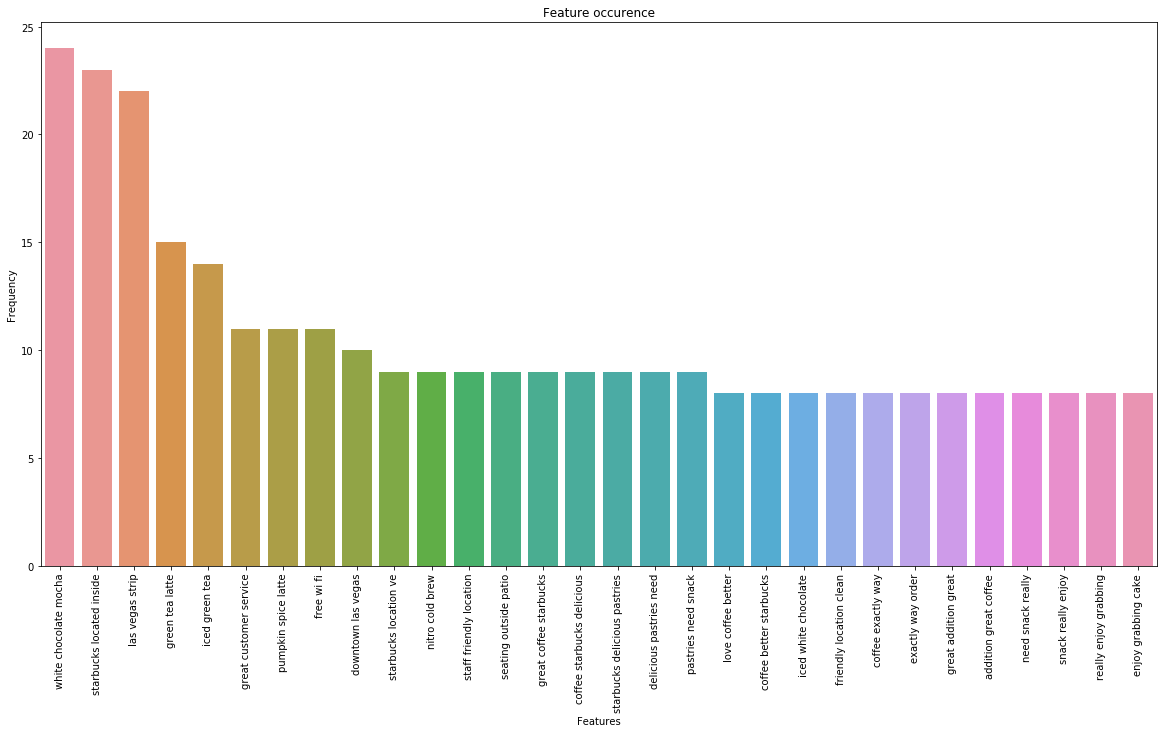

In [170]:
plt.figure(figsize = [20,10])
starbucks = sns.barplot(x='Features', y='Frequency', data=resstarbucks)            
plt.title("Feature occurence")
plt.xticks(rotation = 90)
plt.show()
fig1 = starbucks.get_figure()    
fig1.savefig('starbucks_review.png')

#### Restaurant_McDonald's_Review

In [171]:
resta_mcdonald = yelp_restaurant[yelp_restaurant['name_y']=="McDonald's"]

In [172]:
resta_mcdonald.shape

(578, 19)

In [173]:
common_words_mcdonald = get_top_n_words(resta_mcdonald.text, 30)
words_mcd = []
freque_mcd = []
for word, freq in common_words_mcdonald:
    words_mcd.append(word)
    freque_mcd.append(freq)
    print(word, freq)

vanilla ice cream 14
quarter pounder cheese 11
fast food restaurant 11
fast food places 9
fast food joint 8
open 24 hours 8
fast food place 8
egg white delight 6
fast food chain 6
ice cream cones 6
waited 10 minutes 6
bacon egg cheese 6
grand big mac 6
spicy chicken sandwich 6
food hot fresh 5
ice cream cone 5
http www yelp 5
www yelp com 5
free wi fi 5
asked speak manager 5
great customer service 5
angel park trail 5
bad customer service 4
review fast food 4
went drive ordered 4
national vanilla ice 4
ice cream day 4
soft vanilla ice 4
ordered quarter pounder 4
diet dr pepper 4


In [174]:
resmcdonald = pd.DataFrame({'Features': words_mcd,'Frequency': freque_mcd})
resmcdonald.head()

Features  Frequency
0       vanilla ice cream         14
1  quarter pounder cheese         11
2    fast food restaurant         11
3        fast food places          9
4         fast food joint          8

#### Feature Mapping of McDonald's

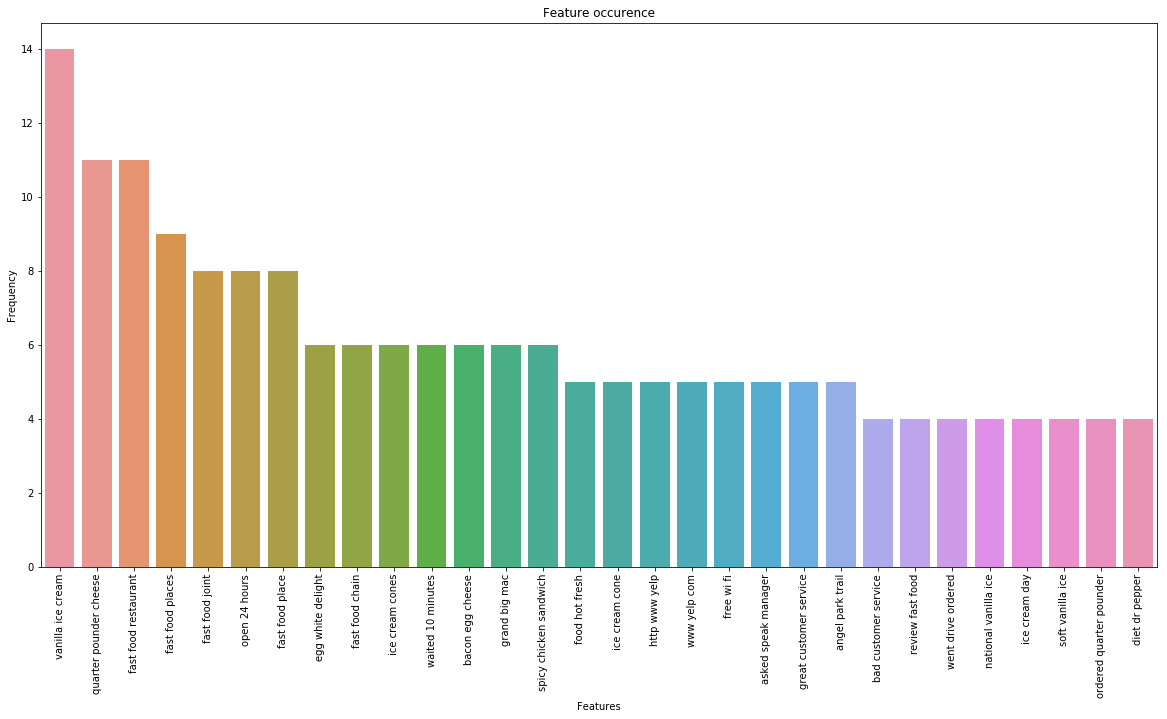

In [175]:
plt.figure(figsize = [20,10])
mcdonald = sns.barplot(x='Features', y='Frequency', data=resmcdonald)            
plt.title("Feature occurence")
plt.xticks(rotation = 90)
plt.show()
fig2 = mcdonald.get_figure()    
fig2.savefig('mcdonald_review.png')

#### Service

In [176]:
yelp_service = yelp_rbu[yelp_rbu['cat_desc']=='Service']
yelp_service.head()

business_id               review_id  stars_x  \
68  hi85yAQhKmiNmwm_jzkCRA  alTTRUEPKEYf_VwqULWnBw      1.0   
69  hi85yAQhKmiNmwm_jzkCRA  9AonMjQ41OlMkKERbrQENA      2.0   
70  hi85yAQhKmiNmwm_jzkCRA  YBNbRqUC1O4TitZzFqgL8Q      1.0   
71  hi85yAQhKmiNmwm_jzkCRA  NVwbnNohvXxVtW_NofgFPQ      1.0   
72  hi85yAQhKmiNmwm_jzkCRA  ZON1khOWzibM54rnFzRaug      1.0   

                                                 text                 user_id  \
68  If you know what a clip joint is, these guys a...  hG7b0MtEbXx5QzbzE6C_VA   
69  So.......................... the customer serv...  sdD7FsJOmalb1JQpgqKJhQ   
70  These guys were contracted by SolarCity to cha...  2160BZupNpVOhAk_8MTtbQ   
71  the most expenseive electric company i ever ha...  ZlqKPGgQxOnMaFPlMHNeFA   
72  waited 2 days to be tould the price quoted was...  0h8DMWR75kjAY-QdQUSNVA   

   CustomerEXP  fans                                            friends  \
68         Bad     0                             frQs7y5qa-X1pvAM0sJe1w   
69         Bad    22  lytQKaE-Sn7WDlcy4WYxYg, wy4NZPGAonzuz9RzSDtDNA...   
70         Bad     1  KWlSwPr7R_uEWWROXCwIvw, e49SPu087PbhStnU9ACrOQ...   
71         Bad     0                                               None   
72         Bad     0                             9OWWK9rTgGEY_b-Pf-Mjjg   

    name_x  review_count_x  useful_y  \
68  Stefan              10        18   
69     Jen             200       606   
70  Steven              18        32   
71   Peggy               3        20   
72   Recco               7         5   

                                  categories       city             name_y  \
68  Home Services, Contractors, Electricians  Las Vegas  One Hour Electric   
69  Home Services, Contractors, Electricians  Las Vegas  One Hour Electric   
70  Home Services, Contractors, Electricians  Las Vegas  One Hour Electric   
71  Home Services, Contractors, Electricians  Las Vegas  One Hour Electric   
72  Home Services, Contractors, Electricians  Las Vegas  One Hour Electric   

    review_count_y  stars_y state cat_desc  rank_score  
68              48      2.5    NV  Service        10.2  
69              48      2.5    NV  Service       309.0  
70              48      2.5    NV  Service        18.5  
71              48      2.5    NV  Service         8.9  
72              48      2.5    NV  Service         4.1

In [177]:
yelp_service.sort_values(by = 'rank_score', ascending = False).head()

business_id               review_id  stars_x  \
611378  SUH0cMrRsysIu2hKqQQKBA  o1ijg237hpw3j6HVzTuYCQ      2.0   
110840  ZV3G2LxpLLuZOFbn208Z5A  EHW6tlmzyJJAyWfj6ncytA      5.0   
277327  PU-CSnMYXizOS3uhr316eg  PhjePJsc5K4J0YC9334CJQ      3.0   
423288  UQaHqPLWt9V_xEl-EF45lw  odYyXpKEuCwMH9VcQyOi6w      5.0   
196173  4QcgDtZkU6RE5v7FEXUuqw  peXvat9v15zpEMRl-AV1hQ      5.0   

                                                     text  \
611378  Auf unserer Suche nach einer günstigen Unterku...   
110840  Unser erster Besichtigungspunkt in Las Vegas w...   
277327  Historic for sure, but I'm not seeing what the...   
423288  PPG stands for Points Per Game in sports stats...   
196173  I just wrote this review and I need to post it...   

                       user_id CustomerEXP  fans  \
611378  --2vR0DIsmQ6WfcSzKWigw         Bad   668   
110840  --2vR0DIsmQ6WfcSzKWigw        Good   668   
277327  JjXuiru1_ONzDkYVrHN0aw     Neutral  1434   
423288  Hi10sGSZNxQH3NLyWSZ1oA        Good  1574   
196173  Hi10sGSZNxQH3NLyWSZ1oA        Good  1574   

                                                  friends   name_x  \
611378  caH_Pg46Jtm4pdOM-JoJyg, KJEiAkxBpXS7LeJL0M2Qrg...   Harald   
110840  caH_Pg46Jtm4pdOM-JoJyg, KJEiAkxBpXS7LeJL0M2Qrg...   Harald   
277327  MFI4twbiz8UJxU-XHSlH-g, Rjb-gVuAeS9h75Svz0aYsg...  Richard   
423288  2vFUeQGnG8zdLSQkwfChog, 6YDC4RNaAUdTSkhJ1WUC9w...      Fox   
196173  2vFUeQGnG8zdLSQkwfChog, 6YDC4RNaAUdTSkhJ1WUC9w...      Fox   

        review_count_x  useful_y  \
611378            1350    154202   
110840            1350    154202   
277327            1086     99162   
423288            6407     89418   
196173            6407     89418   

                                               categories        city  \
611378  Hotels & Travel, Event Planning & Services, Ho...   Las Vegas   
110840  Local Flavor, Landmarks & Historical Buildings...   Las Vegas   
277327  Tours, Public Services & Government, Transport...  Pittsburgh   
423288  Landmarks & Historical Buildings, Public Servi...  Pittsburgh   
196173  Local Flavor, Public Services & Government, La...     Toronto   

                           name_y  review_count_y  stars_y state cat_desc  \
611378            The Rita Suites             101      2.0    NV  Service   
110840  Welcome To Las Vegas Sign             333      4.5    NV  Service   
277327           Duquesne Incline             337      4.0    PA  Service   
423288                  PPG Tower               6      4.5    PA  Service   
196173                    Toronto              17      5.0    ON  Service   

        rank_score  
611378     62286.2  
110840     62286.2  
277327     40420.8  
423288     38161.5  
196173     38161.5

In [178]:
yelp_service.name_y.value_counts()

Cox Communications                                  513
US Post Office                                      438
The UPS Store                                       266
Allegiant Air                                       234
OnTrac                                              230
CenturyLink Store                                   219
Move 4 Less                                         207
Legacy Air                                          196
Superb Maids                                        178
Elara by Hilton Grand Vacations                     171
John Gluch - Platinum Living Realty                 169
The Grandview at Las Vegas                          162
Yes! Air Conditioning & Plumbing                    151
Credit One Bank                                     146
Rhino's Cleaning Services                           143
OneGuard Home Warranties                            137
Overnight Prints                                    132
Rumor Boutique Resort                           

#### Service_Cox Communications_Review

In [179]:
service_coxcomm = yelp_service[yelp_service['name_y']=="Cox Communications"]

In [180]:
service_coxcomm.shape

(513, 19)

In [181]:
common_words_coxcomm = get_top_n_words(service_coxcomm.text, 30)
words_coxcomm = []
freque_coxcomm = []
for word, freq in common_words_coxcomm:
    words_coxcomm.append(word)
    freque_coxcomm.append(freq)
    print(word, freq)

high speed internet 21
worst customer service 17
cox customer service 11
horrible customer service 11
customer service rep 10
called customer service 9
cox internet service 8
awful awful awful 8
systems experiencing outage 8
experiencing outage related 8
outage related internet 8
related internet tv 8
internet tv phone 8
tv phone services 8
phone services working 8
services working correct 8
working correct issues 8
correct issues soon 8
issues soon possible 8
soon possible estimated 8
possible estimated time 8
estimated time restore 8
poor customer service 7
customer service horrible 7
currently outage area 7
outage area systems 7
area systems experiencing 7
cable hbo cinamax 6
hbo cinamax internet 6
cable internet service 6


In [182]:
servicecoxcomm = pd.DataFrame({'Features': words_coxcomm,'Frequency': freque_coxcomm})
servicecoxcomm.head()

Features  Frequency
0        high speed internet         21
1     worst customer service         17
2       cox customer service         11
3  horrible customer service         11
4       customer service rep         10

#### Feature Mapping of Cox Communications

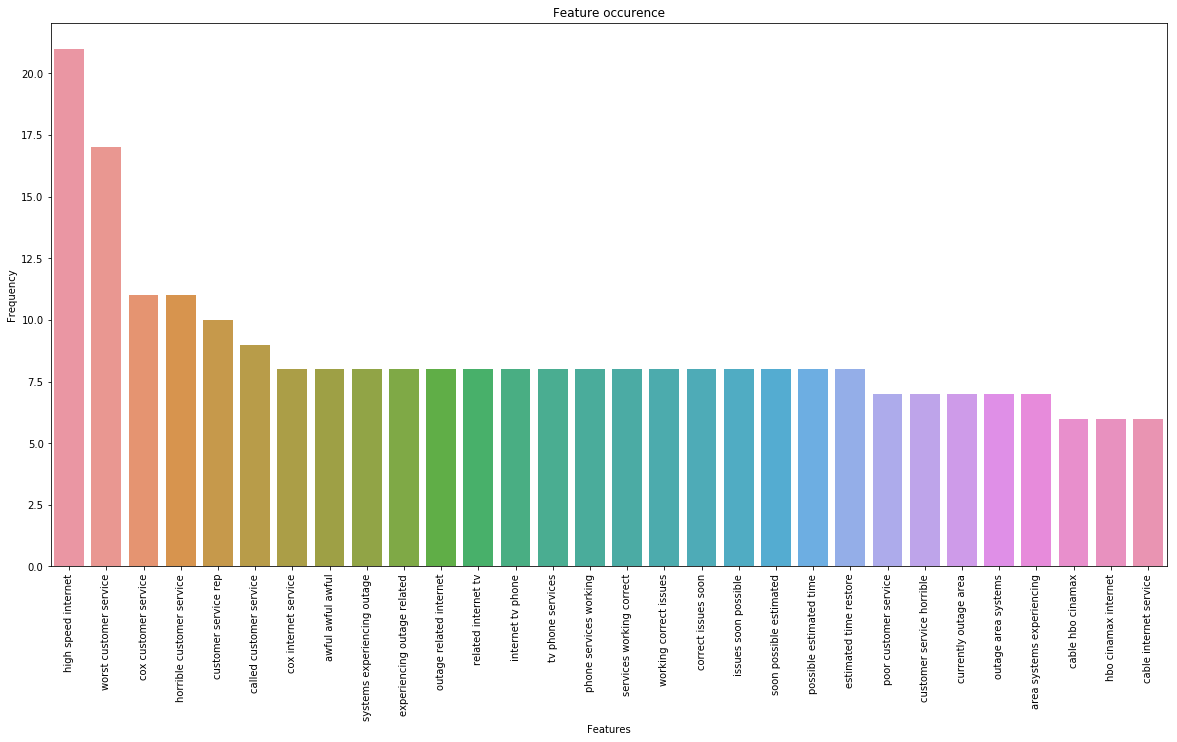

In [183]:
plt.figure(figsize = [20,10])
coxcomm = sns.barplot(x='Features', y='Frequency', data=servicecoxcomm)            
plt.title("Feature occurence")
plt.xticks(rotation = 90)
plt.show()
fig3 = coxcomm.get_figure()    
fig3.savefig('coxcomm_review.png')

#### Service_US Post Office_Review

In [184]:
service_uspost = yelp_service[yelp_service['name_y']=="US Post Office"]

In [185]:
service_uspost.shape

(438, 19)

In [186]:
common_words_uspost = get_top_n_words(service_uspost.text, 30)
words_uspost = []
freque_uspost = []
for word, freq in common_words_uspost:
    words_uspost.append(word)
    freque_uspost.append(freq)
    print(word, freq)

worst post office 16
going post office 14
went post office 11
post office location 9
flat rate boxes 9
visit post office 9
customer service skills 9
flat rate box 8
come post office 8
post office las 8
office las vegas 8
poor customer service 8
post office times 7
post office time 7
bad customer service 7
post office pick 6
self service machine 6
post office ve 6
worst customer service 6
called post office 6
local post office 5
good customer service 5
typical post office 5
people waiting line 5
run post office 5
avoid post office 5
post office needs 5
like post office 5
post office line 5
horrible customer service 5


In [187]:
serviceuspost = pd.DataFrame({'Features': words_uspost,'Frequency': freque_uspost})
serviceuspost.head()

Features  Frequency
0     worst post office         16
1     going post office         14
2      went post office         11
3  post office location          9
4       flat rate boxes          9

#### Feature Mapping of US Post Office

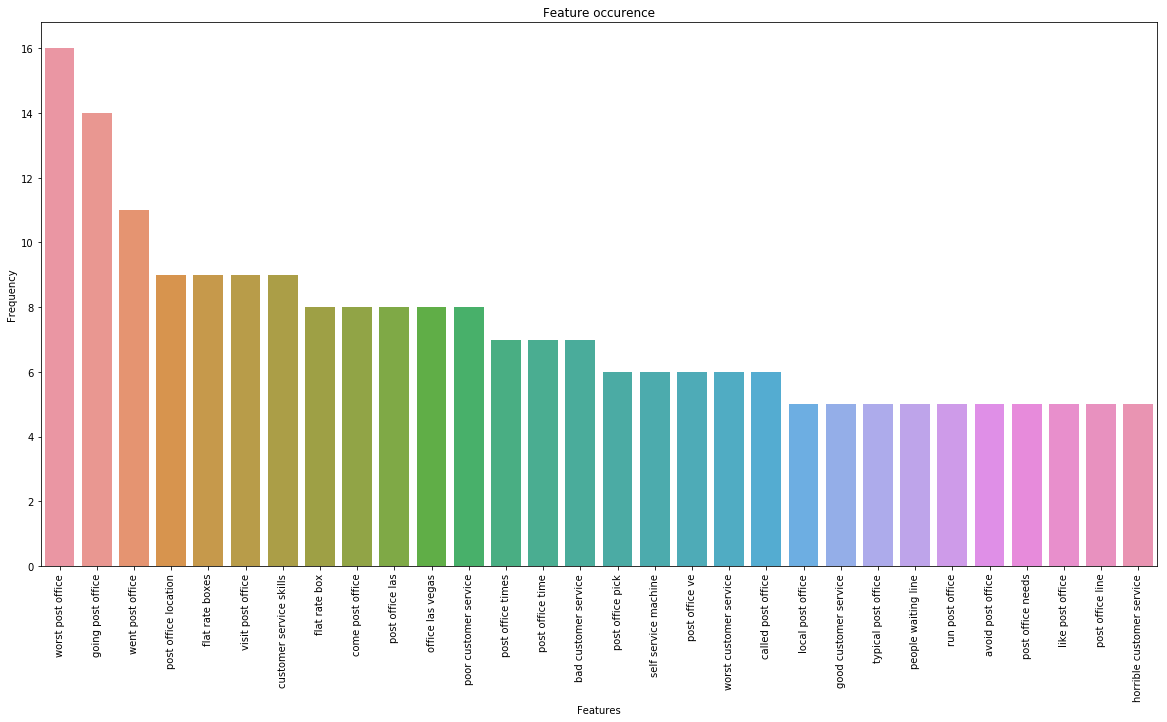

In [188]:
plt.figure(figsize = [20,10])
uspost = sns.barplot(x='Features', y='Frequency', data=serviceuspost)            
plt.title("Feature occurence")
plt.xticks(rotation = 90)
plt.show()
fig4 = uspost.get_figure()    
fig4.savefig('uspost_review.png')

#### Shopping

In [189]:
yelp_shopping = yelp_rbu[yelp_rbu['cat_desc']=='Shopping']
yelp_shopping.head()

business_id               review_id  stars_x  \
202  c-xX-gBihfVyPW0w-zbNBw  fdhHqQ3vOQdq0W1sNATQUw      3.0   
203  c-xX-gBihfVyPW0w-zbNBw  6OHNoBfdBHuLo6nsZPfW4A      3.0   
204  c-xX-gBihfVyPW0w-zbNBw  NiXiP_2Cl0eAckjNZVydGA      2.0   
355  uMwYOjgIdqfGupQSj31puw  S92UTMG8GKUt0Y7pTkpvbw      3.0   
356  uMwYOjgIdqfGupQSj31puw  _TNSf3MLwXeQ8jwLkcL1Vw      4.0   

                                                  text  \
202  Usually, I would give this a one star, but sin...   
203  Why will I think Woodside Square A-OK?? There ...   
204  This little local mall used to be awesome. OK,...   
355  Parking is ALWAYS a problem at FMP. Well, mayb...   
356  100 times better than P. Mall, whose glory day...   

                    user_id CustomerEXP  fans  \
202  jlu4CztcSxrKx56ba1a5AQ     Neutral    83   
203  CxDOIDnH8gp9KXzpBHJYXw     Neutral   715   
204  Yp7_GeD6KTRoo4Nteqv4SA         Bad    14   
355  jlu4CztcSxrKx56ba1a5AQ     Neutral    83   
356  YBT3EKUNN4IP8m4x7sGu1g        Good    35   

                                               friends    name_x  \
202  QAAWz02cj67-ndc1qqiS4g, vh9gbtiOgTgwTGAXBXWkXw...    Kristy   
203  mrru6hbeQLvagU4vkfuqmw, wt0lL3xJIGeJ1r0qO-vkrg...  Jennifer   
204  udLNFDpOQ2XJB6WQ9axHJA, lPNsKsD-HvdgkzfGq-Gjig...   Melissa   
355  QAAWz02cj67-ndc1qqiS4g, vh9gbtiOgTgwTGAXBXWkXw...    Kristy   
356  Qku2_2s2rXOj5BxkuHp0EA, MMS_gu4o0X8Us0yfugT5Gw...       Deb   

     review_count_x  useful_y                  categories     city  \
202             600      4346  Shopping, Shopping Centers  Toronto   
203            6314     20336  Shopping, Shopping Centers  Toronto   
204             325       773  Shopping, Shopping Centers  Toronto   
355             600      4346  Shopping Centers, Shopping  Markham   
356             909      2453  Shopping Centers, Shopping  Markham   

                  name_y  review_count_y  stars_y state  cat_desc  rank_score  
202      Woodside Square              15      3.0    ON  Shopping      1943.3  
203      Woodside Square              15      3.0    ON  Shopping     10243.1  
204      Woodside Square              15      3.0    ON  Shopping       410.9  
355  First Markham Place              68      3.5    ON  Shopping      1943.3  
356  First Markham Place              68      3.5    ON  Shopping      1264.4

In [190]:
yelp_shopping.sort_values(by = 'rank_score', ascending = False).head()

business_id               review_id  stars_x  \
329890  4ONpzAtnKbDig_e_O_8TtQ  rqeYJ-F26J87InZbKdn8jg      5.0   
81626   NlNZgDWJhOYz9zoKE2ydMQ  FcI2aAfGcNLUAvxJw0GhlA      4.0   
339891  nxo1C5te8Aug-Lf5D_0b1A  DxtgwygP35hMMlO9W5D_9A      3.0   
423406  80gbR_B0HKrAsR3GZxMlBw  dIdUPv10qCJkAEwNrTID1A      4.0   
423488  CsguIDuWWwsy58seF52RoQ  kTLNq_O1R-aIOKVM7pw1jA      2.0   

                                                     text  \
329890  Auf unserer Casino Besichtigungstour sind wir ...   
81626   Eine der schönsten Einkaufspassagen sind siche...   
339891  Marilyn Monroeville Mall was popular with the ...   
423406  What is Victoria's Secret anyway? What is she ...   
423488  Owned by Macy Grey.\r\r\n\r\r\nMacy's is one o...   

                       user_id CustomerEXP  fans  \
329890  --2vR0DIsmQ6WfcSzKWigw        Good   668   
81626   --2vR0DIsmQ6WfcSzKWigw        Good   668   
339891  Hi10sGSZNxQH3NLyWSZ1oA     Neutral  1574   
423406  Hi10sGSZNxQH3NLyWSZ1oA        Good  1574   
423488  Hi10sGSZNxQH3NLyWSZ1oA         Bad  1574   

                                                  friends  name_x  \
329890  caH_Pg46Jtm4pdOM-JoJyg, KJEiAkxBpXS7LeJL0M2Qrg...  Harald   
81626   caH_Pg46Jtm4pdOM-JoJyg, KJEiAkxBpXS7LeJL0M2Qrg...  Harald   
339891  2vFUeQGnG8zdLSQkwfChog, 6YDC4RNaAUdTSkhJ1WUC9w...     Fox   
423406  2vFUeQGnG8zdLSQkwfChog, 6YDC4RNaAUdTSkhJ1WUC9w...     Fox   
423488  2vFUeQGnG8zdLSQkwfChog, 6YDC4RNaAUdTSkhJ1WUC9w...     Fox   

        review_count_x  useful_y  \
329890            1350    154202   
81626             1350    154202   
339891            6407     89418   
423406            6407     89418   
423488            6407     89418   

                                               categories         city  \
329890                         Shopping, Shopping Centers    Las Vegas   
81626            Shopping, Local Flavor, Shopping Centers    Las Vegas   
339891                         Shopping, Shopping Centers  Monroeville   
423406                        Fashion, Shopping, Lingerie    Beachwood   
423488  Women's Clothing, Shoe Stores, Men's Clothing,...  Monroeville   

                         name_y  review_count_y  stars_y state  cat_desc  \
329890                 The Park              68      4.0    NV  Shopping   
81626   The Grand Canal Shoppes             154      3.5    NV  Shopping   
339891         Monroeville Mall              62      2.5    PA  Shopping   
423406        Victoria's Secret               6      2.5    OH  Shopping   
423488                   Macy's              11      3.5    PA  Shopping   

        rank_score  
329890     62286.2  
81626      62286.2  
339891     38161.5  
423406     38161.5  
423488     38161.5

In [191]:
yelp_shopping.name_y.value_counts()

Gold & Silver Pawn Shop               376
Apple Store                           331
Moon Valley Nurseries                 323
Ulta Beauty                           292
Target                                236
Last Chance Clearance Store           216
CVS Pharmacy                          213
Living Spaces                         210
Sephora                               198
Costco                                197
The Home Depot                        187
Ashley HomeStore                      177
Cox Communications                    175
Buffalo Exchange                      168
Spencer's TV & Appliance              167
American Furniture Warehouse          161
The Dump Furniture Outlet             152
Verizon                               152
Pink Cherry Wax                       145
Edgepark Medical Supplies             141
Ross Dress for Less                   134
Desert Wireless                       132
David's Bridal                        126
Goodwill                          

#### Shopping_Gold & Silver Pawn Shop_Review

In [192]:
shop_goldsilv = yelp_shopping[yelp_shopping['name_y']=="Gold & Silver Pawn Shop"]

In [193]:
shop_goldsilv.shape

(376, 19)

In [194]:
common_words_goldsilv = get_top_n_words(shop_goldsilv.text, 30)
words_goldsilv = []
freque_goldsilv = []
for word, freq in common_words_goldsilv:
    words_goldsilv.append(word)
    freque_goldsilv.append(freq)
    print(word, freq)

gold silver pawn 35
silver pawn shop 26
fan pawn stars 13
pawn stars merchandise 11
rick old man 10
open 24 hours 8
pawn stars tv 8
watch pawn stars 7
just pawn shop 7
pawn shop tourist 7
http www yelp 7
www yelp com 7
yelp com biz_photos 7
com biz_photos 3t0erqk1mktn58764yzmfw 7
biz_photos 3t0erqk1mktn58764yzmfw select 7
3t0erqk1mktn58764yzmfw select yhmxtp3titzunwkgzymhow 7
super bowl rings 7
expect pawn shop 6
like pawn shop 6
typical pawn shop 6
pawn stars shop 6
don waste time 5
average pawn shop 5
watching pawn stars 5
actual pawn shop 5
downtown las vegas 5
las vegas blvd 5
old man rick 5
love pawn stars 5
pawn stars history 5


In [195]:
shopgoldsilv = pd.DataFrame({'Features': words_goldsilv,'Frequency': freque_goldsilv})
shopgoldsilv.head()

Features  Frequency
0        gold silver pawn         35
1        silver pawn shop         26
2          fan pawn stars         13
3  pawn stars merchandise         11
4            rick old man         10

#### Feature Mapping of Gold & Silver Pawn Shop

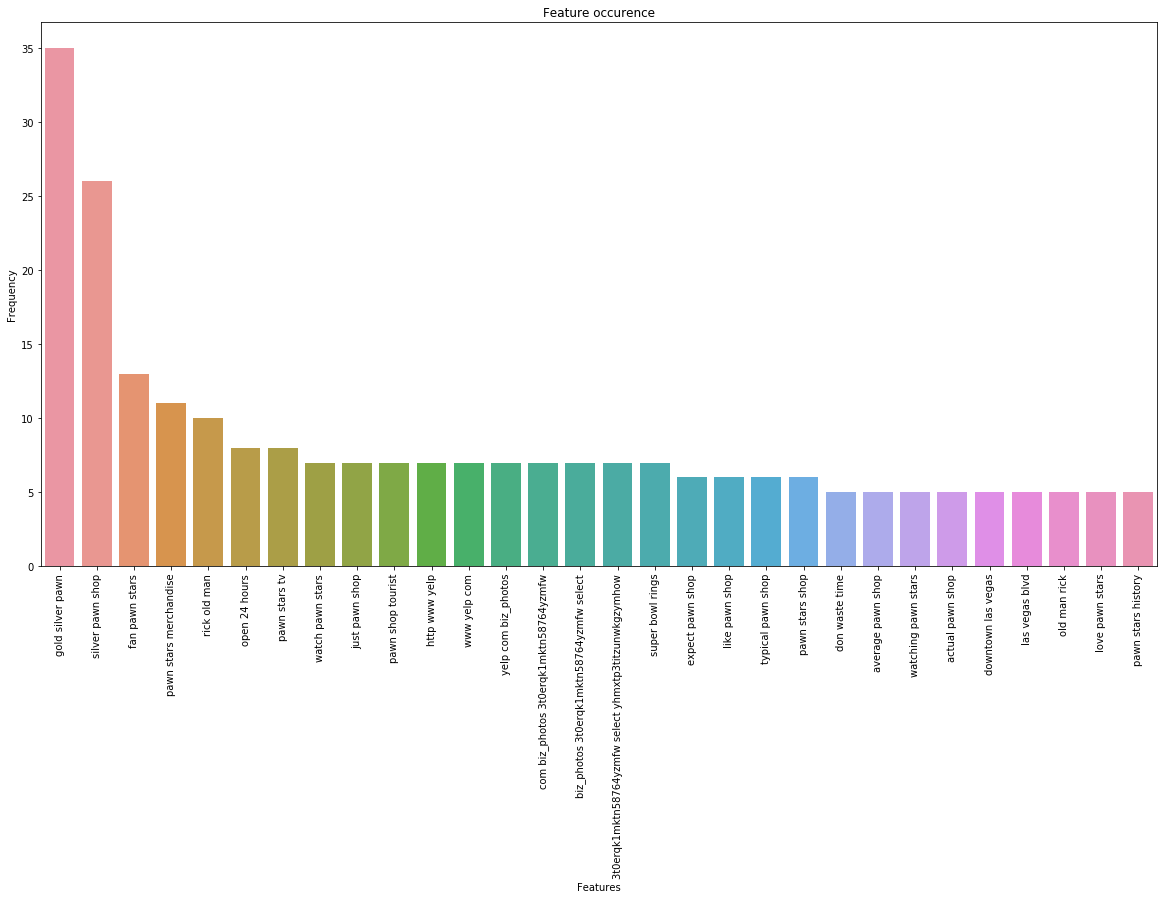

In [196]:
plt.figure(figsize = [20,10])
goldsilv = sns.barplot(x='Features', y='Frequency', data=shopgoldsilv)            
plt.title("Feature occurence")
plt.xticks(rotation = 90)
plt.show()
fig5 = goldsilv.get_figure()    
fig5.savefig('goldsilv_review.png')

#### Shopping_Apple Store_Review

In [197]:
shop_apple = yelp_shopping[yelp_shopping['name_y']=="Apple Store"]

In [198]:
shop_apple.shape

(331, 19)

In [199]:
common_words_apple = get_top_n_words(shop_apple.text, 30)
words_apple = []
freque_apple = []
for word, freq in common_words_apple:
    words_apple.append(word)
    freque_apple.append(freq)
    print(word, freq)

genius bar appointment 19
went apple store 13
appointment genius bar 11
experience apple store 8
great customer service 7
going apple store 7
long story short 6
15 minutes later 6
service apple store 6
like apple store 6
worst customer service 6
apple stores ve 6
come apple store 6
apple store employees 6
buy new iphone 5
best customer service 5
make reservation genius 5
reservation genius bar 5
brand new iphone 5
apple store ve 5
minutes appointment time 5
buy apple product 5
love apple products 5
10 15 minutes 5
buy apple products 5
apple store fashion 5
wait 10 minutes 4
apple store location 4
apple store just 4
mac book pro 4


In [200]:
shopapple = pd.DataFrame({'Features': words_apple,'Frequency': freque_apple})
shopapple.head()

Features  Frequency
0  genius bar appointment         19
1        went apple store         13
2  appointment genius bar         11
3  experience apple store          8
4  great customer service          7

#### Feature Mapping of Apple Store

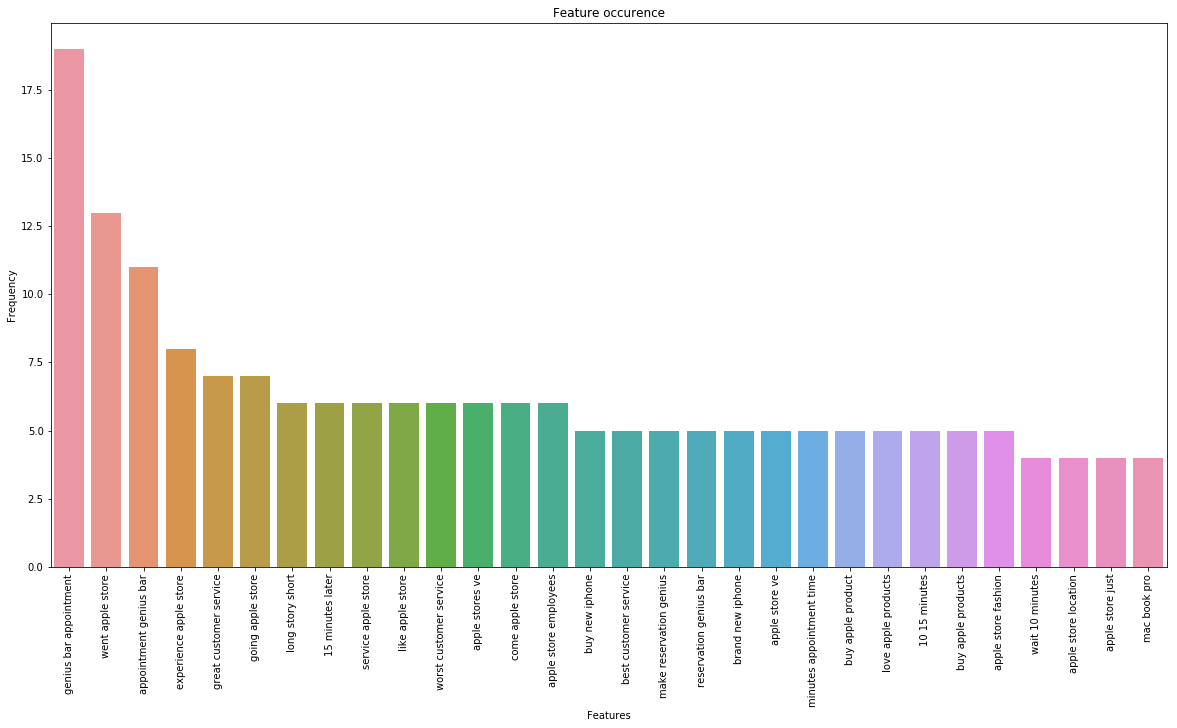

In [201]:
plt.figure(figsize = [20,10])
apple = sns.barplot(x='Features', y='Frequency', data=shopapple)            
plt.title("Feature occurence")
plt.xticks(rotation = 90)
plt.show()
fig6 = apple.get_figure()    
fig6.savefig('apple_review.png')

#### Medical

In [202]:
yelp_medical = yelp_rbu[yelp_rbu['cat_desc']=='Medical']
yelp_medical.head()

business_id               review_id  stars_x  \
981   zHa_vAL9N9qwdFOiBLHSxg  5-1-bpNfmu5J2g_XTn27Dw      2.0   
982   zHa_vAL9N9qwdFOiBLHSxg  ig9VvNt22zD7xO_p7CAvog      1.0   
983   zHa_vAL9N9qwdFOiBLHSxg  ooc5qw0DiKwyif7qDspX5Q      1.0   
2982  8PQpQ5an-qdNAR_WOH4kaQ  MwH_kGVhWtSaOhd5SG_Irw      5.0   
5102  3qUkDAu6q9rzebzjvyWKwA  0Pcj8_QbCblgrvJVTLr8-g      1.0   

                                                   text  \
981   I, personally did not have a great experience ...   
982   DO NOT GO THERE! I had a terrible experience b...   
983   I am speaking for myself and friends and famil...   
2982  Dr. Edward Chow changed my life. \r\r\n\r\r\nI...   
5102  My Mum was complaining of chest and stomach pa...   

                     user_id CustomerEXP  fans  \
981   jlu4CztcSxrKx56ba1a5AQ         Bad    83   
982   eO9BqcaASVYEXLT-ION02Q         Bad     0   
983   5soGFlGNsVhlnqhBjIK9xQ         Bad     1   
2982  jlu4CztcSxrKx56ba1a5AQ        Good    83   
5102  tAcB1ZohRtjozsymvqqHzQ         Bad     1   

                                                friends  name_x  \
981   QAAWz02cj67-ndc1qqiS4g, vh9gbtiOgTgwTGAXBXWkXw...  Kristy   
982   W2W3fr5jf95rvtdsz3iBrQ, _PtKsUkimxfEY-lrr4bEZg...   Jenny   
983   onQSpp24MuNm66wk7qYjVw, D0_CpoBSX1rEke0rviybsQ...    Jeff   
2982  QAAWz02cj67-ndc1qqiS4g, vh9gbtiOgTgwTGAXBXWkXw...  Kristy   
5102  635wWz2LA0PJm3S1XqmnKQ, hKQWd-OO3ui0h4vOzoBBFA...      JR   

      review_count_x  useful_y                                  categories  \
981              600      4346              Optometrists, Health & Medical   
982                1         7              Optometrists, Health & Medical   
983                5         9              Optometrists, Health & Medical   
2982             600      4346              Health & Medical, Optometrists   
5102              16        26  Family Practice, Doctors, Health & Medical   

             city               name_y  review_count_y  stars_y state  \
981   Scarborough        Albert S Y Ng               3      1.5    ON   
982   Scarborough        Albert S Y Ng               3      1.5    ON   
983   Scarborough        Albert S Y Ng               3      1.5    ON   
2982      Markham      Dr. Edward Chow               3      3.5    ON   
5102      Calgary  Apex Medical Clinic               3      2.0    AB   

     cat_desc  rank_score  
981   Medical      1943.3  
982   Medical         3.1  
983   Medical         5.4  
2982  Medical      1943.3  
5102  Medical        15.5

In [203]:
yelp_medical.sort_values(by = 'rank_score', ascending = False).head()

business_id               review_id  stars_x  \
423125  YNvZdMLXa4q8e9tiE4ge4A  ZqiR3Zx6whjmSq-2AqMnaw      3.0   
168963  7xvbhxambsLPJ5ZqaSNxtw  QVFRyr5cs4zRyjrOJrRS4g      4.0   
170624  cj0JeG1FSgkMlFe-MK4yOQ  yIhzRzerG9ygk1agMseUqQ      2.0   
171062  -IM_8ZQ1uxXXr_ASII9k3g  5gCreROKA1te0xeROxRU8g      4.0   
172376  Bf0xp6P9mtwIzDeqLWD9Jg  5UEcDZegLsqxR4vTJZg3bw      3.0   

                                                     text  \
423125  I'm stokes to be able to post this review. Cle...   
168963  A family member recently had a knee replacemen...   
170624  Sometimes people get sick. Sometimes they get ...   
171062  A dentist that's open on a Friday? Unheard of!...   
172376  Typical CVS with the usual departments - perso...   

                       user_id CustomerEXP  fans  \
423125  Hi10sGSZNxQH3NLyWSZ1oA     Neutral  1574   
168963  hWDybu_KvYLSdEFzGrniTw        Good   528   
170624  hWDybu_KvYLSdEFzGrniTw         Bad   528   
171062  hWDybu_KvYLSdEFzGrniTw        Good   528   
172376  hWDybu_KvYLSdEFzGrniTw     Neutral   528   

                                                  friends name_x  \
423125  2vFUeQGnG8zdLSQkwfChog, 6YDC4RNaAUdTSkhJ1WUC9w...    Fox   
168963  QZ3grLRAy7do7inT4OcltQ, 6pbATMd0sGeOJvAEt6znqw...  Bruce   
170624  QZ3grLRAy7do7inT4OcltQ, 6pbATMd0sGeOJvAEt6znqw...  Bruce   
171062  QZ3grLRAy7do7inT4OcltQ, 6pbATMd0sGeOJvAEt6znqw...  Bruce   
172376  QZ3grLRAy7do7inT4OcltQ, 6pbATMd0sGeOJvAEt6znqw...  Bruce   

        review_count_x  useful_y  \
423125            6407     89418   
168963           10022     74829   
170624           10022     74829   
171062           10022     74829   
172376           10022     74829   

                                               categories       city  \
423125                  Health & Medical, Medical Centers  Cleveland   
168963       Health & Medical, Doctors, Internal Medicine  Charlotte   
170624                          Health & Medical, Doctors  Charlotte   
171062  General Dentistry, Health & Medical, Cosmetic ...  Charlotte   
172376  Health & Medical, Walk-in Clinics, Medical Cen...  Fort Mill   

                                          name_y  review_count_y  stars_y  \
423125  Louis Stokes Cleveland VA Medical Center              11      3.5   
168963         Presbyterian Orthopaedic Hospital               4      5.0   
170624         Presbyterian Urgent Care-Randolph               7      2.5   
171062    Dentistry of the Carolinas - SouthPark              10      3.5   
172376                              MinuteClinic              11      2.5   

       state cat_desc  rank_score  
423125    OH  Medical     38161.5  
168963    NC  Medical     33096.6  
170624    NC  Medical     33096.6  
171062    NC  Medical     33096.6  
172376    SC  Medical     33096.6

In [204]:
yelp_medical.name_y.value_counts()

Abbey Dental                                                 185
NextCare Urgent Care                                          90
Warner Family Practice, P.C.                                  90
Nevada Orthopedic & Spine Center                              90
Summerlin Hospital Medical Center                             89
Mayo Clinic                                                   88
The Joint Chiropractic                                        79
Mayo Clinic Hospital                                          79
Spring Valley Hospital Medical Center                         78
East Valley Family Medical                                    75
Chandler Regional Medical Center                              74
Mercy Gilbert Medical Center                                  72
Family Doctors of Green Valley                                72
Dignity Health - St. Rose Dominican, Siena Campus             72
Preferred Homecare                                            71
The LASIK Vision Institut

#### Medical_Abbey Dental_Review

In [205]:
medical_abbeyden = yelp_medical[yelp_medical['name_y']=="Abbey Dental"]

In [206]:
medical_abbeyden.shape

(185, 19)

In [207]:
common_words_abbeyden = get_top_n_words(medical_abbeyden.text, 30)
words_abbeyden = []
freque_abbeyden = []
for word, freq in common_words_abbeyden:
    words_abbeyden.append(word)
    freque_abbeyden.append(freq)
    print(word, freq)

went abbey dental 8
needed root canal 6
free second opinion 6
called abbey dental 5
root canal crown 4
stay away place 4
don sucked blitz 4
sucked blitz tv 4
blitz tv ads 4
tv ads prepared 4
ads prepared sweet 4
prepared sweet talked 4
sweet talked ripped 4
talked ripped ways 4
ripped ways review 4
said need root 3
need root canal 3
hours past appointment 3
just want money 3
staff abbey dental 3
work abby dental 3
don waste time 3
nv dental board 3
appointment abbey dental 3
abby dental staff 3
wait 20 minutes 2
want root canal 2
dentist abbey dental 2
didn feel pressured 2
past appointment time 2


In [208]:
medicalabbeyden = pd.DataFrame({'Features': words_abbeyden,'Frequency': freque_abbeyden})
medicalabbeyden.head()

Features  Frequency
0    went abbey dental          8
1    needed root canal          6
2  free second opinion          6
3  called abbey dental          5
4     root canal crown          4

#### Feature Mapping of Abbey Dental Clinic

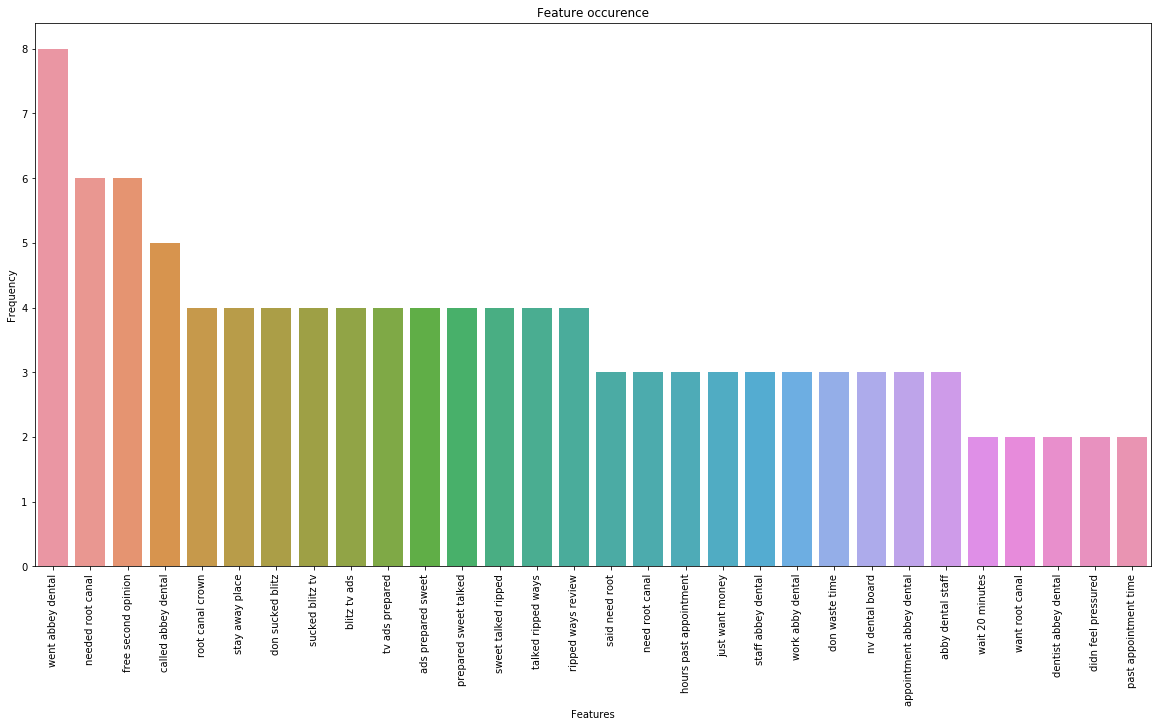

In [209]:
plt.figure(figsize = [20,10])
abbeyden = sns.barplot(x='Features', y='Frequency', data=medicalabbeyden)            
plt.title("Feature occurence")
plt.xticks(rotation = 90)
plt.show()
fig7 = abbeyden.get_figure()    
fig7.savefig('abbeyden_review.png')

#### Medical_NextCare Urgent Care_Review

In [210]:
medical_nxtcare = yelp_medical[yelp_medical['name_y']=="NextCare Urgent Care"]

In [211]:
medical_nxtcare.shape

(90, 19)

In [212]:
common_words_nxtcare = get_top_n_words(medical_nxtcare.text, 30)
words_nxtcare = []
freque_nxtcare = []
for word, freq in common_words_nxtcare:
    words_nxtcare.append(word)
    freque_nxtcare.append(freq)
    print(word, freq)

rudy noriega pa 5
nextcare urgent care 4
urgent care center 3
urgent care experience 3
went urgent care 3
office urgent care 3
primary care physician 2
half hour doctor 2
urgent care times 2
blood tests ekg 2
urgent care clinic 2
good urgent care 2
urinary tract infection 2
visiting urgent care 2
urgent care able 2
physician assistant express 2
going emergency room 2
friendly clean professional 2
breathing treatment just 2
office visit charge 2
urgent care clinics 2
urgent care facility 2
using urgent care 2
urgent care facilities 2
waiting room clean 2
urgent care told 2
visit urgent care 2
regular doctor office 2
finally got room 2
minimal wait time 2


In [213]:
medicalnxtcare = pd.DataFrame({'Features': words_nxtcare,'Frequency': freque_nxtcare})
medicalnxtcare.head()

Features  Frequency
0         rudy noriega pa          5
1    nextcare urgent care          4
2      urgent care center          3
3  urgent care experience          3
4        went urgent care          3

#### Feature Mapping of NextCare Urgent Care

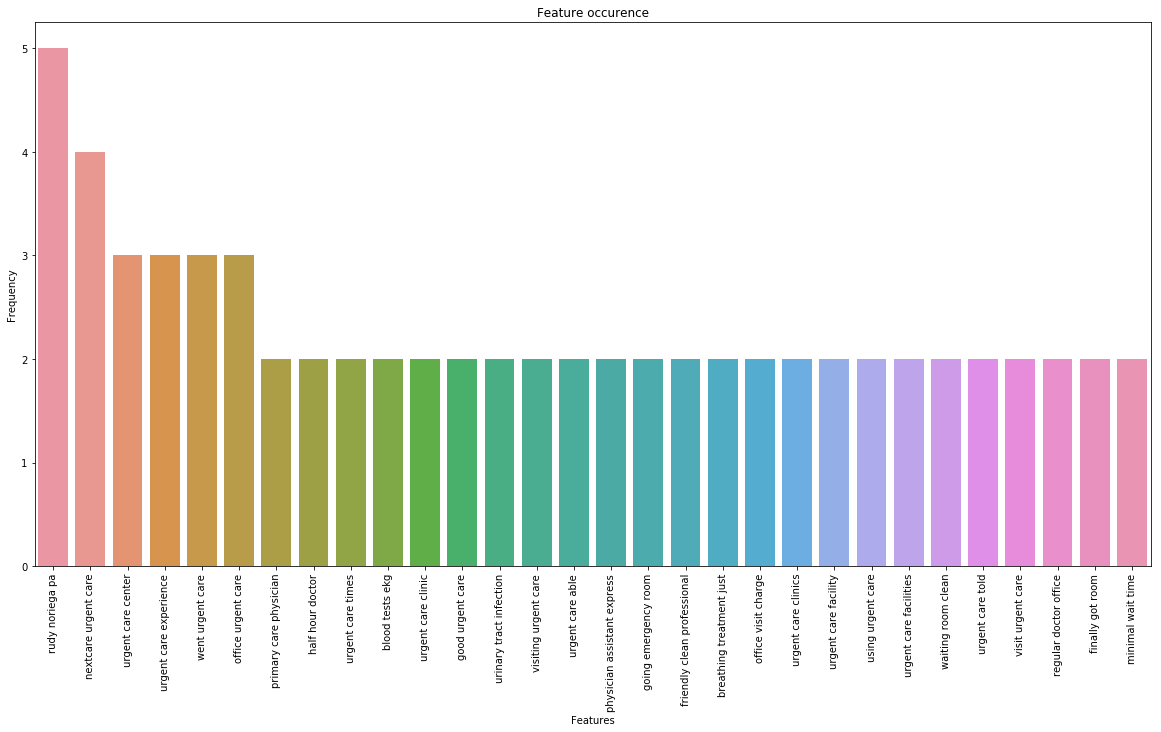

In [214]:
plt.figure(figsize = [20,10])
nxtcare = sns.barplot(x='Features', y='Frequency', data=medicalnxtcare)            
plt.title("Feature occurence")
plt.xticks(rotation = 90)
plt.show()
fig8 = nxtcare.get_figure()    
fig8.savefig('nxtcare_review.png')

#### Fitness

In [215]:
yelp_fitness = yelp_rbu[yelp_rbu['cat_desc']=='Fitness']
yelp_fitness.head()

business_id               review_id  stars_x  \
0  ujmEBvifdJM6h6RLv4wQIg  Q1sbwvVQXV2734tPgoKj4Q      1.0   
1  ujmEBvifdJM6h6RLv4wQIg  8F9500ycq3mvpjf0glbFFg      3.0   
2  ujmEBvifdJM6h6RLv4wQIg  _2_WR2PZHWt_N5IhkjFWbw      4.0   
3  ujmEBvifdJM6h6RLv4wQIg  jxjvu8zMuIIItx7r49EE4A      3.0   
4  ujmEBvifdJM6h6RLv4wQIg  h_-p8Fs8Kf9dGKFnySVxpA      2.0   

                                                text                 user_id  \
0  Total bill for this horrible service? Over $8G...  hG7b0MtEbXx5QzbzE6C_VA   
1  Nursing staff is ok.  I'm still a bit leary ab...  tH0uKD-vNwMoEc3Xk3Cbdg   
2  My Mom spent a couple of days in this hospital...  QJI9OSEn6ujRCtrX06vs1w   
3  I came here for an outpatient test procedure. ...  m-BZLIIh5PCAKnzH0qj_0Q   
4  I had to get my man to a Hospital and this one...  Fv0e9RIV9jw5TX3ctA1WbA   

  CustomerEXP  fans                                            friends  \
0         Bad     0                             frQs7y5qa-X1pvAM0sJe1w   
1     Neutral   251  yjT7lRM1uHWERITm5qy8Vg, Ezj4B5x1wJp6LxiFJptbfw...   
2        Good   293  SDytcPY5fiuuDbTkPE8GyA, Pn4W0F3wc6B5fAEwpKY0rQ...   
3     Neutral    88  aWggU2ElzsAlotZw-XxgXA, uERlyO-ASZag6XXouCrkhg...   
4         Bad   309  9GhiQOLaM6ZGrrFG-SppwQ, 7RLTk4rftgaUIDSau7RLTA...   

     name_x  review_count_x  useful_y  \
0    Stefan              10        18   
1     Cathy            1184      7176   
2         J            1982     14163   
3    Sheila             734      3969   
4  Christie             858     27129   

                                          categories       city  \
0  Fitness & Instruction, Doctors, Health & Medic...  Las Vegas   
1  Fitness & Instruction, Doctors, Health & Medic...  Las Vegas   
2  Fitness & Instruction, Doctors, Health & Medic...  Las Vegas   
3  Fitness & Instruction, Doctors, Health & Medic...  Las Vegas   
4  Fitness & Instruction, Doctors, Health & Medic...  Las Vegas   

                  name_y  review_count_y  stars_y state cat_desc  rank_score  
0  MountainView Hospital             238      2.5    NV  Fitness        10.2  
1  MountainView Hospital             238      2.5    NV  Fitness      3300.9  
2  MountainView Hospital             238      2.5    NV  Fitness      6347.7  
3  MountainView Hospital             238      2.5    NV  Fitness      1834.2  
4  MountainView Hospital             238      2.5    NV  Fitness     11201.7

In [216]:
yelp_fitness.sort_values(by = 'rank_score', ascending = False).head()

business_id               review_id  stars_x  \
147375  t-o_Sraneime4DDhWrQRBA  CC0kHI2mVkdsQWVUx3W2pg      5.0   
496912  yFFFiuPQdHr-KPqD9s2LsQ  aMwX5NJqeLd7BoKeiYeNXA      5.0   
435967  kjY3355lQ-M2JHVwrey2qg  IGC4SE_KMoAkV5MMtyS6zA      5.0   
269390  bAa0ue-BJychrcJZd-xSzw  DOWDS3EmqheH7SN3O5zOZQ      5.0   
423454  yTeTCkzIIw1rXatDWh_ISA  S-hFD8xFBmi5b_y38IZxbQ      5.0   

                                                     text  \
147375  Unser eher bescheidenes Motel war in der Nähe ...   
496912  Wenn man von Boulder City zum Lake Mead anreis...   
435967  Als Hotelgast des Stratosphere Hotel konnten w...   
269390  Wer mehrere Tage in Las Vegas ist, sollte s ni...   
423454  People say this city sucks? They don't have a ...   

                       user_id CustomerEXP  fans  \
147375  --2vR0DIsmQ6WfcSzKWigw        Good   668   
496912  --2vR0DIsmQ6WfcSzKWigw        Good   668   
435967  --2vR0DIsmQ6WfcSzKWigw        Good   668   
269390  --2vR0DIsmQ6WfcSzKWigw        Good   668   
423454  Hi10sGSZNxQH3NLyWSZ1oA        Good  1574   

                                                  friends  name_x  \
147375  caH_Pg46Jtm4pdOM-JoJyg, KJEiAkxBpXS7LeJL0M2Qrg...  Harald   
496912  caH_Pg46Jtm4pdOM-JoJyg, KJEiAkxBpXS7LeJL0M2Qrg...  Harald   
435967  caH_Pg46Jtm4pdOM-JoJyg, KJEiAkxBpXS7LeJL0M2Qrg...  Harald   
269390  caH_Pg46Jtm4pdOM-JoJyg, KJEiAkxBpXS7LeJL0M2Qrg...  Harald   
423454  2vFUeQGnG8zdLSQkwfChog, 6YDC4RNaAUdTSkhJ1WUC9w...     Fox   

        review_count_x  useful_y  \
147375            1350    154202   
496912            1350    154202   
435967            1350    154202   
269390            1350    154202   
423454            6407     89418   

                                               categories          city  \
147375  Active Life, Hotels & Travel, Casinos, Golf, E...     Las Vegas   
496912      Parks, Lakes, Active Life, Recreation Centers  Boulder City   
435967      Active Life, Amusement Parks, Hotels & Travel     Las Vegas   
269390                  Lakes, Parks, Active Life, Hiking  Boulder City   
423454  Active Life, Food, Public Services & Governmen...     Cleveland   

                                    name_y  review_count_y  stars_y state  \
147375                      Wynn Las Vegas            2795      4.0    NV   
496912                   Lakemead Overlook              10      4.5    NV   
435967                Stratosphere Thrills             180      4.0    NV   
269390  Lake Mead National Recreation Area             130      4.0    NV   
423454                   City of Cleveland              30      3.5    OH   

       cat_desc  rank_score  
147375  Fitness     62286.2  
496912  Fitness     62286.2  
435967  Fitness     62286.2  
269390  Fitness     62286.2  
423454  Fitness     38161.5

In [217]:
yelp_fitness.name_y.value_counts()

LA Fitness                                     643
Wynn Las Vegas                                 423
Circus Circus Las Vegas Hotel and Casino       367
Las Vegas Athletic Club                        329
High Roller                                    228
The Signature at MGM Grand                     225
Pinball Hall Of Fame                           224
Life Time Athletic                             223
Anytime Fitness                                216
Topgolf                                        210
GoodLife Fitness                               199
Encore Beach Club                              198
South Point Hotel, Casino & Spa                194
Life Time Fitness                              177
Gold's Gym                                     177
Wet Republic Ultra Pool                        161
Red Rock Canyon                                159
Mountainside Fitness                           154
Vegas Hot! Yoga & Pilates Studio               142
Camelback Mountain             

#### Fitness_LA Fitness_Review

In [218]:
fitness_lafit = yelp_fitness[yelp_fitness['name_y']=="LA Fitness"]

In [219]:
fitness_lafit.shape

(643, 19)

In [220]:
common_words_lafit = get_top_n_words(fitness_lafit.text, 30)
words_lafit = []
freque_lafit = []
for word, freq in common_words_lafit:
    words_lafit.append(word)
    freque_lafit.append(freq)
    print(word, freq)

24 hour fitness 34
la fitness locations 23
la fitness location 14
member la fitness 13
la fitness gyms 13
gym la fitness 12
like la fitness 11
la fitness years 11
personal training session 11
women locker room 11
men locker room 10
poor customer service 10
24 hr fitness 10
la fitness membership 9
membership la fitness 9
paper towel dispensers 9
pool hot tub 9
personal training sessions 8
free personal training 8
ve la fitness 8
worst customer service 8
locker rooms clean 8
high pressure sales 8
la fitness took 8
free weight area 8
customer service skills 8
la fitness member 7
pay initiation fee 7
going la fitness 7
personal training program 7


In [221]:
fitnesslafit = pd.DataFrame({'Features': words_lafit,'Frequency': freque_lafit})
fitnesslafit.head()

Features  Frequency
0       24 hour fitness         34
1  la fitness locations         23
2   la fitness location         14
3     member la fitness         13
4       la fitness gyms         13

#### Feature Mapping of LA Fitness

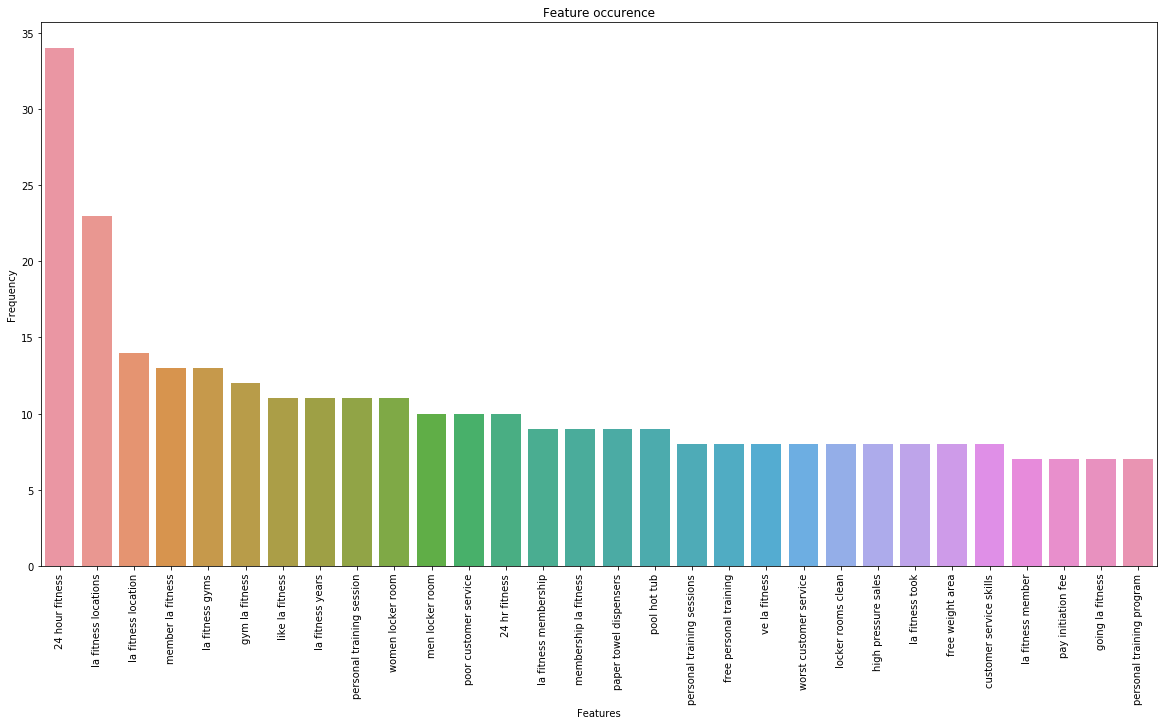

In [222]:
plt.figure(figsize = [20,10])
lafit = sns.barplot(x='Features', y='Frequency', data=fitnesslafit)            
plt.title("Feature occurence")
plt.xticks(rotation = 90)
plt.show()
fig9 = lafit.get_figure()    
fig9.savefig('lafit_review.png')

#### Fitness_Las Vegas Athletic Club_Review

In [223]:
fitness_lasvegas = yelp_fitness[yelp_fitness['name_y']=="Las Vegas Athletic Club"]

In [224]:
fitness_lasvegas.shape

(329, 19)

In [225]:
common_words_lasvegas = get_top_n_words(fitness_lasvegas.text, 30)
words_lasvegas = []
freque_lasvegas = []
for word, freq in common_words_lasvegas:
    words_lasvegas.append(word)
    freque_lasvegas.append(freq)
    print(word, freq)

24 hour fitness 18
26 month contract 13
worst customer service 10
las vegas athletic 9
women locker room 8
vegas athletic club 8
called customer service 7
open 24 hours 7
pay remaining balance 7
read fine print 7
paying year advance 6
tell year contract 6
50 cancellation fee 6
completed 26 month 5
26 month contracts 5
month contracts lvac 5
contracts lvac moving 5
lvac moving late 5
moving late 90 5
late 90 did 5
90 did 2000 5
did 2000 2006 5
2000 2006 renew 5
2006 renew year 5
renew year paying 5
year paying year 5
year advance upfront 5
advance upfront good 5
upfront good price 5
good price december 5


In [226]:
fitnesslasvegas = pd.DataFrame({'Features': words_lasvegas,'Frequency': freque_lasvegas})
fitnesslasvegas.head()

Features  Frequency
0         24 hour fitness         18
1       26 month contract         13
2  worst customer service         10
3      las vegas athletic          9
4       women locker room          8

#### Feature Mapping of Las Vegas Athletic Club

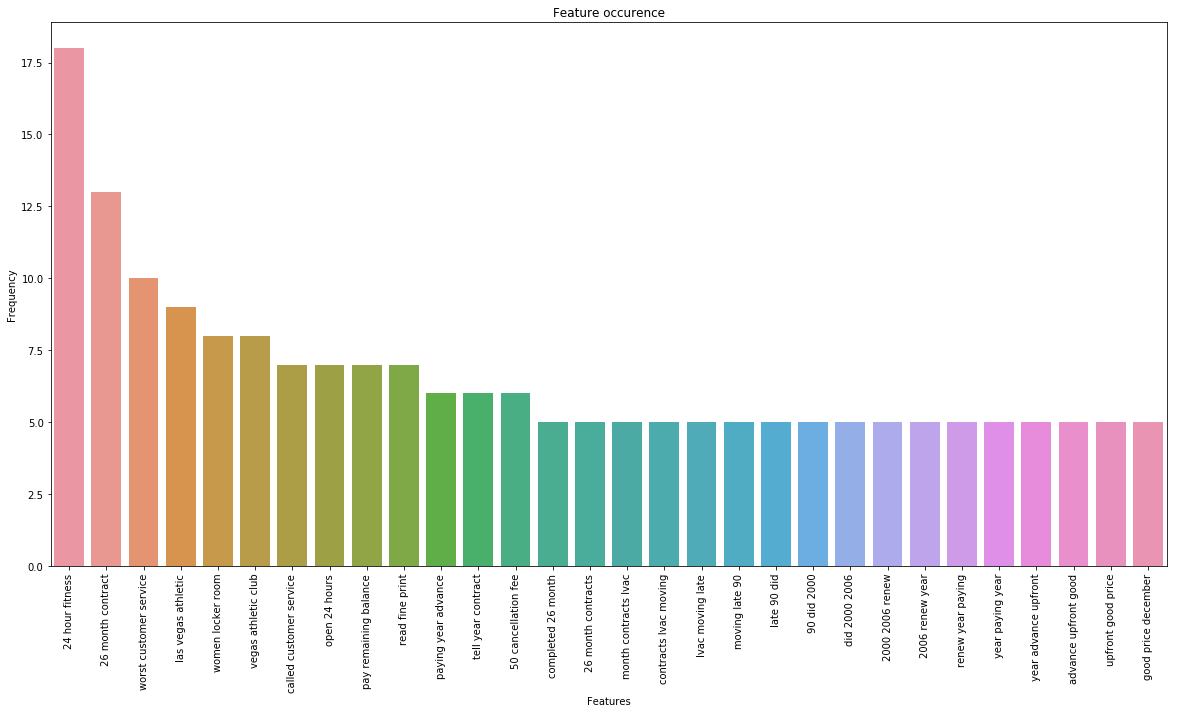

In [227]:
plt.figure(figsize = [20,10])
lasvegas = sns.barplot(x='Features', y='Frequency', data=fitnesslasvegas)            
plt.title("Feature occurence")
plt.xticks(rotation = 90)
plt.show()
fig10 = lasvegas.get_figure()    
fig10.savefig('lasvegas_review.png')